# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

In [88]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

iris = load_iris()
digits = load_digits()

In [89]:
#help(load_digits)

#### iris dataset

In [90]:
#print(iris.target.shape)
#print(iris.data.shape)
#X = iris.data
#y = iris.target
#print(help(plt.imshow))

#### digits dataset

In [91]:
X = digits.data
y = digits.target
#im = X[0,:].reshape((8,8))
#plt.matshow(im, cmap='Greys')

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(1797, 64)
(1437, 64)
(360, 64)


# Summary of results

Here is a table summarizing a measure of correlation observed using:
- different models;
- different definitions of the error;
- different definitions of correlation.

In case of BaggingClassifier and ExtraTrees, where I tested multiple hyperparameter values, I am reporting only the ones with the _largest observed score_.

### Correlation in the predictions

|| Random Forest $\pm$ std. dev.| Bagging Classifier $\pm$ std. dev.| Extra Trees $\pm$ std. dev.|
|------|:----:|:----:|:----:|
| error as average  | 0.2891 $\pm$ 0.0041| 0.3093 $\pm$ 0.0046| 0.2930 $\pm$ 0.0034|
| error as max      | 0.7423 $\pm$ 0.0162| 0.7881 $\pm$ 0.0151| 0.7601 $\pm$ 0.0138|
| error as L2 norm  | 30.15  $\pm$ 0.4033| 32.16  $\pm$ 0.4460| 59.97  $\pm$ 0.6640|


### Correlation in the errors

|| Random Forest $\pm$ std. dev.| Bagging Classifier $\pm$ std. dev.| Extra Trees $\pm$ std. dev.|
|------|:----:|:----:|:----:|
| error as average  | 0.1011 $\pm$ 0.0033| 0.0955 $\pm$ 0.0030| 0.0807 $\pm$ 0.0018|
| error as max      | 0.4405 $\pm$ 0.0254| 0.4032 $\pm$ 0.0272| 0.3807 $\pm$ 0.0189|
| error as L2 norm  | 12.86  $\pm$ 0.2651| 12.28  $\pm$ 0.2427| 19.94  $\pm$ 0.2967|


## Discussion

### Measures of Correlation

First of all, it should be noted that it does not make sense to compare values of different error measures. Also, I'm not even sure whether it makes sense to compare the value of the same error measure but using a different definition of correlation. If this latter comparison made sense, we can remark that using correlation in the errors leads us to believe that the there is less correlation for every use case considered, compared to using the definition of correlation in the predictions.

Anyway, the discussion that makes the most sense, in my opinion, is to compare different ensemble models using the _same error and correlation measures_. In the tables above, this amounts to comparing only values within the same colum.
In this case, we can conclude that:
- the correlations in the Random Forest and Bagging Classifier tend to be always similar;
- the correlations in the Extra Trees, when using definition of the error as the average or the max, tend to be similar to the other models;
- the correlations in the Extra Trees, when using definition of the error as the L2 norm, tend to be much larger than the other models;
- the above two remarks lead me to think that Extra Trees tend to have roughly the same amount of correlation _on average_ as other models; however, their correlation values are _much more spread out_ than other models, in the sense that in Extra Trees it is more likely to find a pair of very highly correlated trees **and** a pair of absolutely uncorrelated trees, than it is in other models.

It is maybe worth mentioning also that there is something interesting happening with the BaggingClassifier. I we take as measure the correlation between the predictions, we see that as the number of features that we include increases, the correlation appears to plateau (or at least, the speed by which it increases tends to diminish). This does not seem to be true if we take as measure of correlation the correlation in the errors, which seems to increase almost linearly!


### Interpretation

Measuring correlations in the **predictions** is an idea presented in [this Github issue](https://github.com/wildtreetech/advanced-comp-2017/issues/8).
I believe that in this case, correlation can be a proxy concept for _robustness_ or _generalizbility_, in the sense that an ensemble with a low correlation is probably better at generalizing and very likely less sensitive to small changes in the data.
Moreover, and perhaps more importantly, the primary assumption behind ensemble methods is that, by averaging **independent** and **unbiased** weak classifiers, one can obtain a low-variance method. In this sense, correlation in the predictions can be a measure of how _independent_ the individual weak classifiers actually are.

Measuring correlations in the errors is an idea presented in [this Quora answer](https://www.quora.com/How-do-I-compute-the-correlation-between-trees-in-the-random-forest) and comments.
In this sense, I believe correlation can be an important metric for assessing the level of certainty for a given prediction. Indeed, if we knew the probability of observing a given correlation value given that the ensemble made a mistake, and we made assumptions on the prior probabilities of observing that correlation and of making an error, we could use Bayes' theorem to compute, for a given prediction, the probability of making an error given a certain observed correlation.

### Scores

In the end, it is important to also make note of the final validation scores for each model.

The best score across all tests I made was obtained using the Extra Trees classifier (98.15%) requiring minimum 2 samples for a split. The basic Random Forest model scored 97.52% followed closely by the Bagging Classifier using 50% of the features, which scored 97.39%. 
Somewhat surprisingly, although this was anticipated in the lecture, the completely random Extra Trees classifier appears to have the best accuracy.
Interestingly, removing bootstrap in the Random Forest classifier yields a small increase in accuracy for this dataset up to 97.80%. However, as expected, this also yields an increase in correlation among predictions, which is an undesirable property.


### Definition of correlation
Following our discussion on [github issues](https://github.com/wildtreetech/advanced-comp-2017/issues/8) I decided to define the error as:
> error = average value of the entries of $C - I$

where:
- the correlation matrix $C \in \mathbb{R}^{N\times N}$ is defined based on the [Pearson product-moment correlation coefficients](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html), where we measure the **correlation in the predictions**;
- $I$ is the identity matrix, included to account for the fact that the correlation of any variable with itself is 1.0, and such quantities could potentially skew the computation of the average

In [93]:
def get_prediction_correlation_matrix(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict(X_val)
        #errors[idx,:] = ( y_pred == y_val )
        errors[idx,:] = y_pred
        
    C = np.corrcoef(errors)
    return C

In [94]:
def get_prediction_correlation_matrix_with_bagging(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict( X_val[:,forest.estimators_features_[idx]] )
        #errors[idx,:] = ( y_pred == y_val )
        errors[idx,:] = y_pred
        
    C = np.corrcoef(errors)
    return C

In [95]:
def error_as_average(C):
    N = C.shape[0]
    return np.mean( np.triu( C - np.diag(np.ones(N)) ) )

In [96]:
def error_as_max(C):
    N = C.shape[0]
    return np.abs( np.triu( C - np.diag(np.ones(N)) ) ).max()

In [97]:
def error_as_L2(C):
    N = C.shape[0]
    return np.linalg.norm( C )

In [98]:
def evaluate_classifier(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_prediction_correlation_matrix(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [99]:
def evaluate_classifier_with_bagging(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_prediction_correlation_matrix_with_bagging(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

## Correlation - RandomForestClassifier

with the following setup:
- bootstrap YES
- ALL features
- FIXED split point

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50, bootstrap=True)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.28905494708 -- 0.00414337956551 -- 0.975166666667
max -- 0.742257821212 -- 0.0161841323864 -- 0.975166666667
L2 -- 30.1540050491 -- 0.403293501197 -- 0.975166666667


## Correlation - RandomForestClassifier
#### RandomForestClassifier - NO bootstrap
with the following setup:
- bootstrap NO
- ALL features
- FIXED split point

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50, bootstrap=False)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.320194103607 -- 0.00399413286362 -- 0.977916666667
max -- 0.790835651383 -- 0.0147032808929 -- 0.977916666667
L2 -- 33.1895008914 -- 0.388406977622 -- 0.977916666667


## Correlation - BaggingClassifier

with the following setup:
- bootstrap NO
- SUBSET of features
- FIXED split point

In [16]:
from sklearn.ensemble import BaggingClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

#feats_percents = np.logspace(start=-12.0,stop=0.0, num=6, base=1.25)
feats_percents = [0.1, 0.17, 0.25, 0.37, 0.50, 0.75]

for feat in feats_percents:
    forest = BaggingClassifier(max_features=feat, n_estimators=50)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier_with_bagging( forest,X_train,y_train,X_val, y_val )

    print(feat,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(feat,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(feat,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

0.1 -- avg -- 0.0660333000479 -- 0.00630740765923 -- 0.925861111111
0.1 -- max -- 0.446705545177 -- 0.0470918588613 -- 0.925861111111
0.1 -- L2 -- 10.6256282834 -- 0.485038296244 -- 0.925861111111
0.17 -- avg -- 0.141116500589 -- 0.00820634864443 -- 0.957638888889
0.17 -- max -- 0.585153139801 -- 0.0348982292853 -- 0.957638888889
0.17 -- L2 -- 16.6490212822 -- 0.734593298628 -- 0.957638888889
0.25 -- avg -- 0.221865243251 -- 0.00788555589999 -- 0.967611111111
0.25 -- max -- 0.690282971154 -- 0.0249094124001 -- 0.967611111111
0.25 -- L2 -- 23.8868023121 -- 0.730532674904 -- 0.967611111111
0.37 -- avg -- 0.272629816676 -- 0.00667800598812 -- 0.971916666667
0.37 -- max -- 0.749451581966 -- 0.0203190463373 -- 0.971916666667
0.37 -- L2 -- 28.6569280146 -- 0.627517607776 -- 0.971916666667
0.5 -- avg -- 0.309310058693 -- 0.00463656947693 -- 0.973888888889
0.5 -- max -- 0.788123817004 -- 0.0150616715965 -- 0.973888888889
0.5 -- L2 -- 32.1563793501 -- 0.445960648917 -- 0.973888888889
0.75 -- av

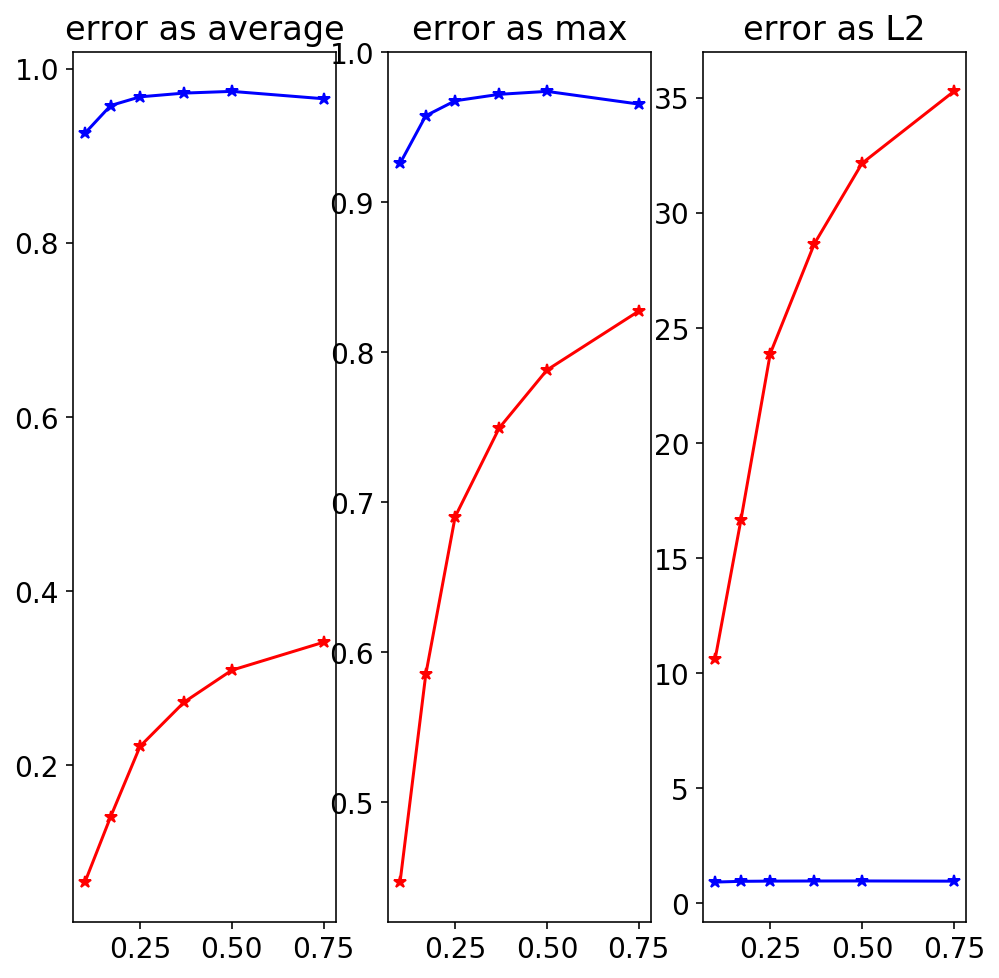

In [17]:
ax = plt.subplot(131)
plt.plot(feats_percents, errors_means_avg, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(feats_percents, errors_means_max, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(feats_percents, errors_means_l2, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as L2')

## Correlation - ExtraTreesClassifier

with the following setup:
- bootstrap NO
- ALL of features
- RANDOM split points

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

splits = [2,4,6]
for split in splits:
    forest = ExtraTreesClassifier(min_samples_split=split, n_estimators=100)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

    print(split,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(split,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(split,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

2 -- avg -- 0.293041654125 -- 0.00339919343347 -- 0.981472222222
2 -- max -- 0.760087642981 -- 0.0138206649303 -- 0.981472222222
2 -- L2 -- 59.9768731787 -- 0.663991273234 -- 0.981472222222
4 -- avg -- 0.286543614034 -- 0.00274126408576 -- 0.980555555556
4 -- max -- 0.751157926832 -- 0.0166646106024 -- 0.980555555556
4 -- L2 -- 58.7015800757 -- 0.537974509064 -- 0.980555555556
6 -- avg -- 0.282586875207 -- 0.00288405565885 -- 0.979583333333
6 -- max -- 0.746860052783 -- 0.0169354364644 -- 0.979583333333
6 -- L2 -- 57.9291076619 -- 0.56473861733 -- 0.979583333333


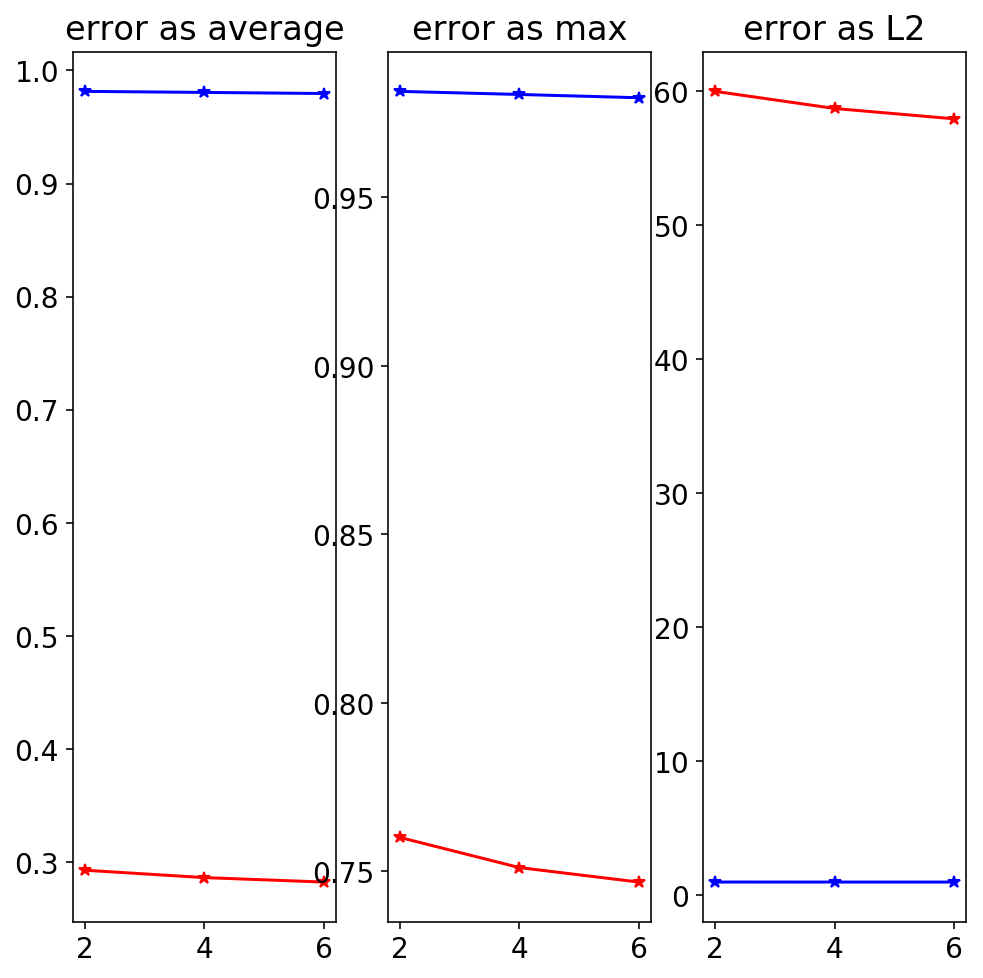

In [19]:
ax = plt.subplot(131)
plt.plot(splits, errors_means_avg, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(splits, errors_means_max, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(splits, errors_means_l2, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as L2')

### Slightly changing the definition of correlation
Following our discussion on [github issues](https://github.com/wildtreetech/advanced-comp-2017/issues/8) I decided to define the error as:
> error = average value of the entries of $C - I$

where:
- the correlation matrix $C \in \mathbb{R}^{N\times N}$ is defined based on the [Pearson product-moment correlation coefficients](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html), where we measure the **correlation in the errors**;
- $I$ is the identity matrix, included to account for the fact that the correlation of any variable with itself is 1.0, and such quantities could potentially skew the computation of the average

In [20]:
def get_error_correlation_matrix(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict(X_val)
        # difference is here
        errors[idx,:] = ( y_pred == y_val )
        
    C = np.corrcoef(errors)
    return C

In [21]:
def get_error_correlation_matrix_with_bagging(forest, y_val):
    errors = np.zeros(shape=(len(forest.estimators_), y_val.shape[0]))
    for idx,tree in enumerate(forest.estimators_):
        y_pred = tree.predict( X_val[:,forest.estimators_features_[idx]] )
        errors[idx,:] = ( y_pred == y_val )
        
    C = np.corrcoef(errors)
    return C

In [22]:
def error_as_average(C):
    N = C.shape[0]
    return np.mean( np.triu( C - np.diag(np.ones(N)) ) )

In [23]:
def error_as_max(C):
    N = C.shape[0]
    return np.abs( np.triu( C - np.diag(np.ones(N)) ) ).max()

In [24]:
def error_as_L2(C):
    N = C.shape[0]
    return np.linalg.norm( C )

In [25]:
def evaluate_classifier(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_error_correlation_matrix(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [26]:
def evaluate_classifier_with_bagging(clf,X_train,y_train,X_val, y_val):
    errors_avg = []
    errors_max = []
    errors_l2 = []
    scores = []
    for iter in range(100):
        clf.random_state = 42 + 3*iter
        clf.fit(X_train,y_train)
        C = get_error_correlation_matrix_with_bagging(clf, y_val)
        errors_avg.append(error_as_average(C))
        errors_max.append(error_as_max(C))
        errors_l2.append(error_as_L2(C))
        scores.append(forest.score(X_val, y_val))
    errors_avg = np.array(errors_avg)
    errors_max = np.array(errors_max)
    errors_l2 = np.array(errors_l2)
    scores = np.array(scores)
    return errors_avg,errors_max,errors_l2,scores

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier(n_estimators=50)
errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

print('avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
print('max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
print('L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')

avg -- 0.0893534384561 -- 0.00312003566608 -- 0.975166666667
max -- 0.389619728247 -- 0.024271273749 -- 0.975166666667
L2 -- 11.8541237718 -- 0.24009729261 -- 0.975166666667


In [28]:
from sklearn.ensemble import BaggingClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

#feats_percents = np.logspace(start=-12.0,stop=0.0, num=6, base=1.25)
feats_percents = [0.1, 0.17, 0.25, 0.37, 0.50, 0.75]

for feat in feats_percents:
    forest = BaggingClassifier(max_features=feat, n_estimators=50)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier_with_bagging( forest,X_train,y_train,X_val, y_val )

    print(feat,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(feat,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(feat,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

0.1 -- avg -- 0.0389581538739 -- 0.00294940715447 -- 0.925861111111
0.1 -- max -- 0.340693914924 -- 0.0402624611807 -- 0.925861111111
0.1 -- L2 -- 8.80837078772 -- 0.139368154147 -- 0.925861111111
0.17 -- avg -- 0.0589167061362 -- 0.00335695898417 -- 0.957638888889
0.17 -- max -- 0.343724440695 -- 0.0249699931483 -- 0.957638888889
0.17 -- L2 -- 9.81480192059 -- 0.209775120738 -- 0.957638888889
0.25 -- avg -- 0.0775125854827 -- 0.00330743609871 -- 0.967611111111
0.25 -- max -- 0.379351706477 -- 0.0258040221861 -- 0.967611111111
0.25 -- L2 -- 11.0169570079 -- 0.237165068551 -- 0.967611111111
0.37 -- avg -- 0.0890764723931 -- 0.00323940617691 -- 0.971916666667
0.37 -- max -- 0.404983947489 -- 0.0290228781106 -- 0.971916666667
0.37 -- L2 -- 11.882463469 -- 0.248473930099 -- 0.971916666667
0.5 -- avg -- 0.101119853803 -- 0.00331841234872 -- 0.973888888889
0.5 -- max -- 0.440465771639 -- 0.025455773191 -- 0.973888888889
0.5 -- L2 -- 12.8607136665 -- 0.265066269935 -- 0.973888888889
0.75 -- a

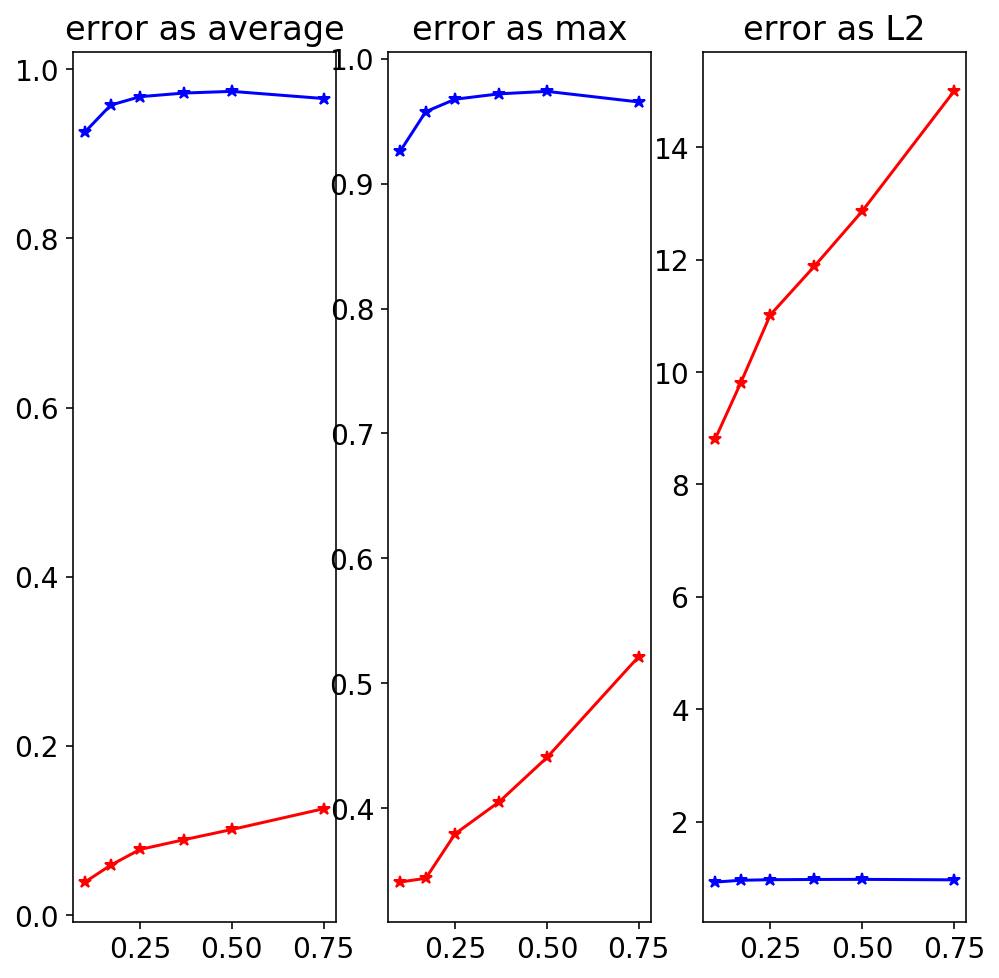

In [29]:
ax = plt.subplot(131)
plt.plot(feats_percents, errors_means_avg, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(feats_percents, errors_means_max, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(feats_percents, errors_means_l2, 'r*-')
plt.plot(feats_percents, score_means, 'b*-')
ax.set_title('error as L2')

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

errors_means_avg = []
errors_means_max = []
errors_means_l2 = []
score_means = []

splits = [2, 4, 6]
for split in splits:
    forest = ExtraTreesClassifier(min_samples_split=split, n_estimators=100)
    errors_avg,errors_max,errors_l2,scores = evaluate_classifier( forest,X_train,y_train,X_val, y_val )

    print(split,'avg', np.mean(errors_avg), np.std(errors_avg), np.mean(scores), sep=' -- ')
    print(split,'max', np.mean(errors_max), np.std(errors_max), np.mean(scores), sep=' -- ')
    print(split,'L2', np.mean(errors_l2), np.std(errors_l2), np.mean(scores), sep=' -- ')
    errors_means_avg.append(np.mean(errors_avg))
    errors_means_max.append(np.mean(errors_max))
    errors_means_l2.append(np.mean(errors_l2))
    score_means.append(np.mean(scores))

2 -- avg -- 0.080732286941 -- 0.00180140207638 -- 0.981472222222
2 -- max -- 0.380708859513 -- 0.0188199667234 -- 0.981472222222
2 -- L2 -- 19.9391915722 -- 0.296699789128 -- 0.981472222222
4 -- avg -- 0.0847631174431 -- 0.00185700965061 -- 0.980555555556
4 -- max -- 0.39031403097 -- 0.0183810888696 -- 0.980555555556
4 -- L2 -- 20.5960499139 -- 0.308489791588 -- 0.980555555556
6 -- avg -- 0.0850571342328 -- 0.0023198541084 -- 0.979583333333
6 -- max -- 0.388997973334 -- 0.0192982123836 -- 0.979583333333
6 -- L2 -- 20.6583844923 -- 0.392032675158 -- 0.979583333333


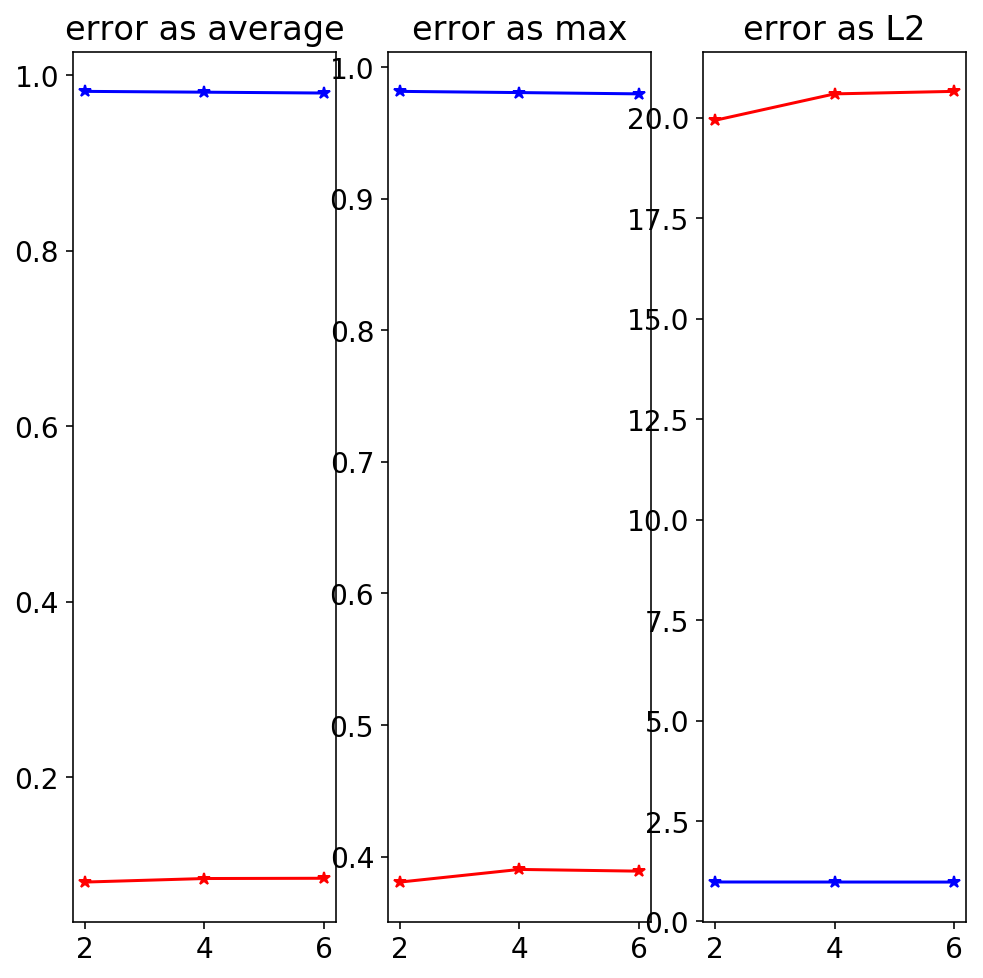

In [31]:
ax = plt.subplot(131)
plt.plot(splits, errors_means_avg, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as average')
ax = plt.subplot(132)
plt.plot(splits, errors_means_max, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as max')
ax = plt.subplot(133)
plt.plot(splits, errors_means_l2, 'r*-')
plt.plot(splits, score_means, 'b*-')
ax.set_title('error as L2')

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

# Summary of results

### Scores

The scores obtained by the different methods were:
- Random Forest     : 97.50%
- Extra Trees       : 97.77%
- Gradient Boosting : 98.06%

For tuning the `num_estimators` hyperparameter, for Random Forest and Extra Trees I just increased it until there wasn't any improvement. For Gradient Boosting I performed a grid search over some parameters that I believed to be plausible. It was surprising to me to see that the only relevant parameter for accuracy was `num_estimators`, and neither `max_depth` nor `learning_rate` appeared to have much effect on this dataset, when it come to achieving max accuracy (they obviously had local effects). 

### Feature importance

The reported feature importances for each method are shown here.

<img src="images/importances_RandomForest.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_ExtraTrees.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_GradientBoosted.png" style="float: left" width="30%" height="30%"/>
<p style="clear: both;">

The first remark to make is that all methods assign a markedly low importance to the left and right borders, but not so much to the top and bottom ones. This is to be expected since all the images have been centered.
The second remark is that Random Forests and Extra Trees display very similar feature importances. Indeed, all of the top 5 features are the same for these two methods. Both methods appear to have a sinusoidal shape in their pattern of feature importance, concentrated in the center of the images. I guess this can be attributed to the fact whether a digit has a horizontal line at its center (e.g. 3,4,5,6,8) is a good discriminatory feature.

Gradient Boosting appears to be quite different from the other two methods. First of all, its feature importances seem more _spread out_ as opposed to concentrated in the center. It also assigns some importance to the lower right pixels, that the other two methods ignored. I am guessing this has something to do with how the residuals look like in the iterative process, but I am still quite confused by it.

### Bonus: binary classification

The reported feature importances for each method are shown here.

<img src="images/importances_RandomForest_binary.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_ExtraTrees_binary.png" style="float: left" width="30%" height="30%"/>
<img src="images/importances_GradientBoosted_binary.png" style="float: left" width="30%" height="30%"/>
<p style="clear: both;">

The feature importances appear to have dramatically changed, although they still retain some features of the previous ones; in particular, the central-vertical dimension of feature importances remains intact. However, there seems to be a much lower _spread_ of importances in the binary classification. This is less visible in the GradientBoosting case, possibly because the _spread_ was already large in the multi-class task.

The obtained scores are:
- Random Forest     : 99.44%
- Extra Trees       : 99.44%
- Gradient Boosting : 97.77%

An interesting thing to note here is that, while the scores for random forests and gradient boosting improved when moving to the simpler binary classification task, the GradienBoosting score decreased. I wonder if this is a consequence of the hyperparameters (I did not repeat the grid-search, but instead simply reused those from the multi-class classification) or if it says something about the suitability of the method to multi-class VS binary tasks.


## RandomForest

In [32]:
forest = RandomForestClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.97499999999999998

Feature ranking:
1. feature 21 (0.047837)
2. feature 43 (0.045494)
3. feature 26 (0.041198)
4. feature 36 (0.040015)
5. feature 42 (0.037224)
6. feature 28 (0.035104)
7. feature 30 (0.031798)
8. feature 20 (0.031560)
9. feature 33 (0.029237)
10. feature 61 (0.028706)
11. feature 13 (0.027397)
12. feature 10 (0.027004)
13. feature 34 (0.026700)
14. feature 38 (0.026430)
15. feature 27 (0.026057)
16. feature 60 (0.025927)
17. feature 19 (0.024751)
18. feature 54 (0.024224)
19. feature 29 (0.023613)
20. feature 53 (0.023135)
21. feature 2 (0.021557)
22. feature 58 (0.021439)
23. feature 44 (0.020915)
24. feature 51 (0.020686)
25. feature 18 (0.020295)
26. feature 46 (0.020273)
27. feature 37 (0.018401)
28. feature 5 (0.017972)
29. feature 62 (0.017659)
30. feature 45 (0.017604)
31. feature 50 (0.016956)
32. feature 35 (0.016818)
33. feature 12 (0.014358)
34. feature 52 (0.014117)
35. feature 25 (0.013710)
36. feature 59 (0.011279)
37. feature 9 (0.010519)
38. feature 41 (0.010459)
39. fea

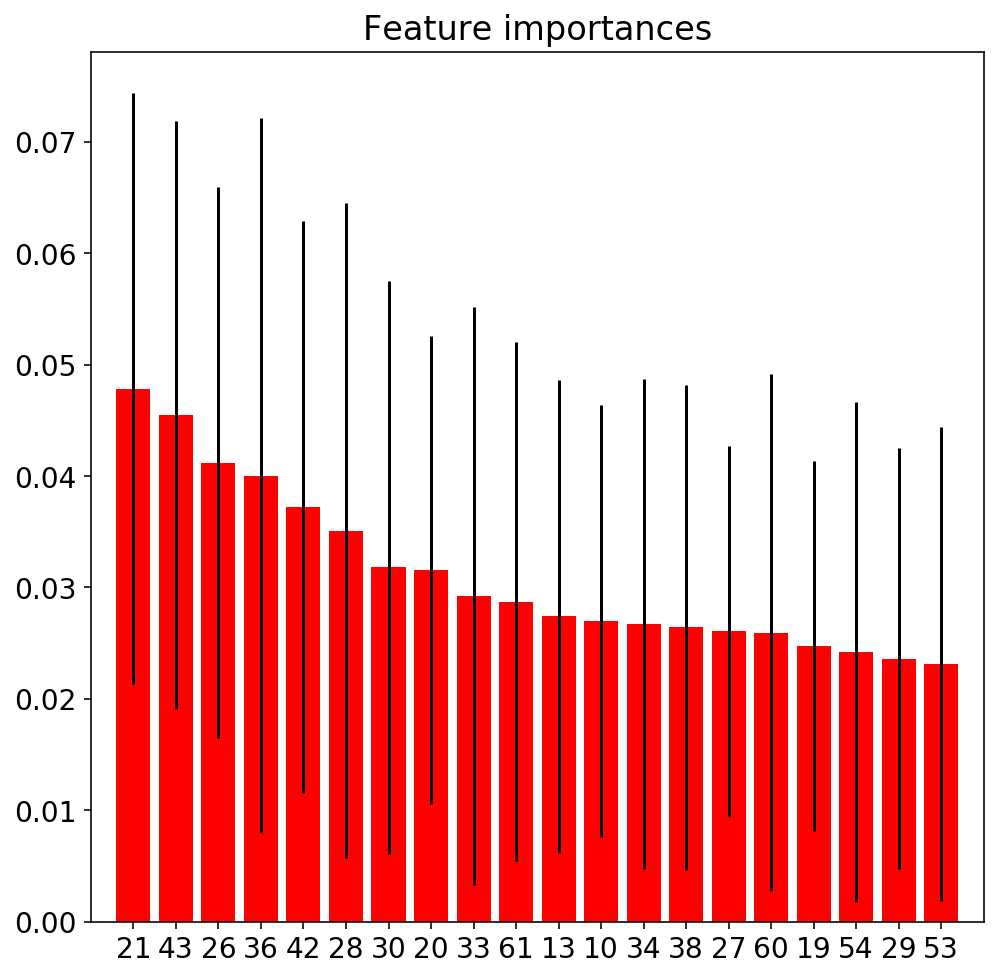

In [33]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(M), importances[most_important],
       color="r", yerr=std[most_important], align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

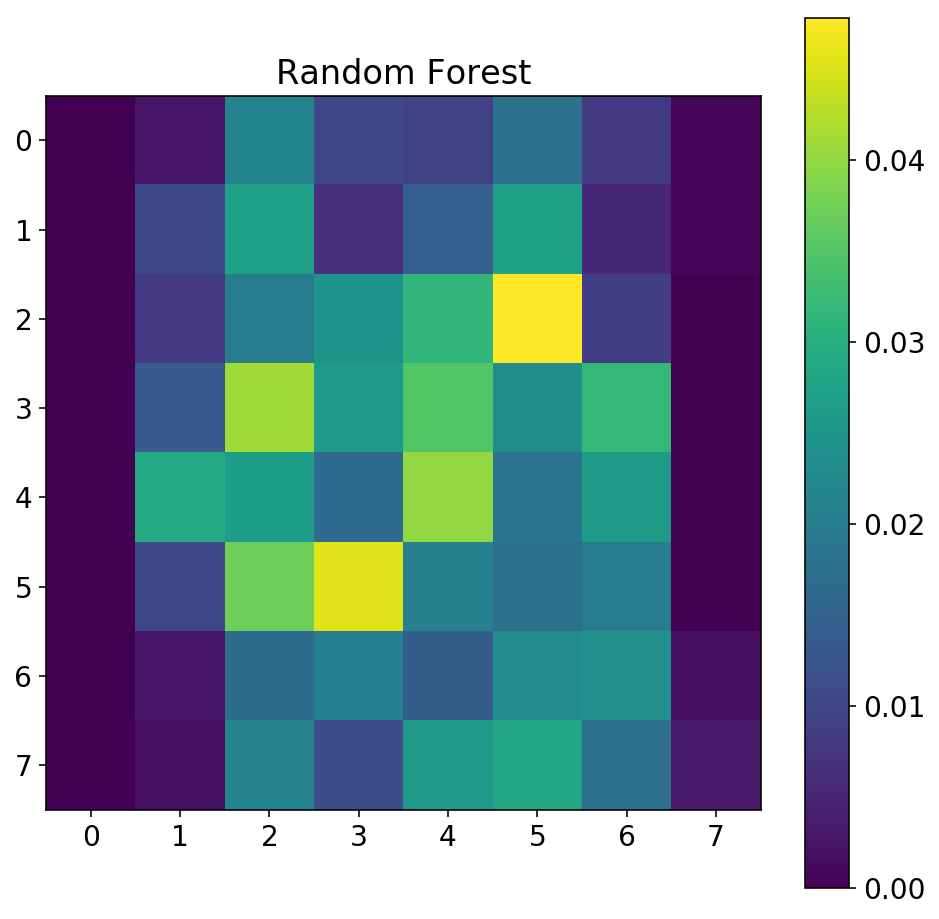

In [37]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Random Forest')
plt.savefig('images/importances_RandomForest.png')


## ExtraTrees

In [38]:
forest = ExtraTreesClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.97777777777777775

Feature ranking:
1. feature 21 (0.044498)
2. feature 43 (0.041310)
3. feature 42 (0.040976)
4. feature 26 (0.039135)
5. feature 36 (0.035919)
6. feature 20 (0.033042)
7. feature 28 (0.032356)
8. feature 27 (0.029912)
9. feature 34 (0.029444)
10. feature 61 (0.028884)
11. feature 13 (0.027094)
12. feature 30 (0.026914)
13. feature 10 (0.026199)
14. feature 60 (0.025588)
15. feature 29 (0.025446)
16. feature 44 (0.024620)
17. feature 19 (0.024412)
18. feature 33 (0.024157)
19. feature 53 (0.023721)
20. feature 35 (0.022662)
21. feature 18 (0.022632)
22. feature 37 (0.022165)
23. feature 54 (0.021770)
24. feature 38 (0.020740)
25. feature 58 (0.020104)
26. feature 51 (0.019341)
27. feature 46 (0.019340)
28. feature 50 (0.019149)
29. feature 5 (0.019069)
30. feature 45 (0.018622)
31. feature 2 (0.018207)
32. feature 62 (0.015527)
33. feature 52 (0.014990)
34. feature 25 (0.013127)
35. feature 12 (0.012461)
36. feature 59 (0.012366)
37. feature 3 (0.011610)
38. feature 41 (0.010664)
39. fea

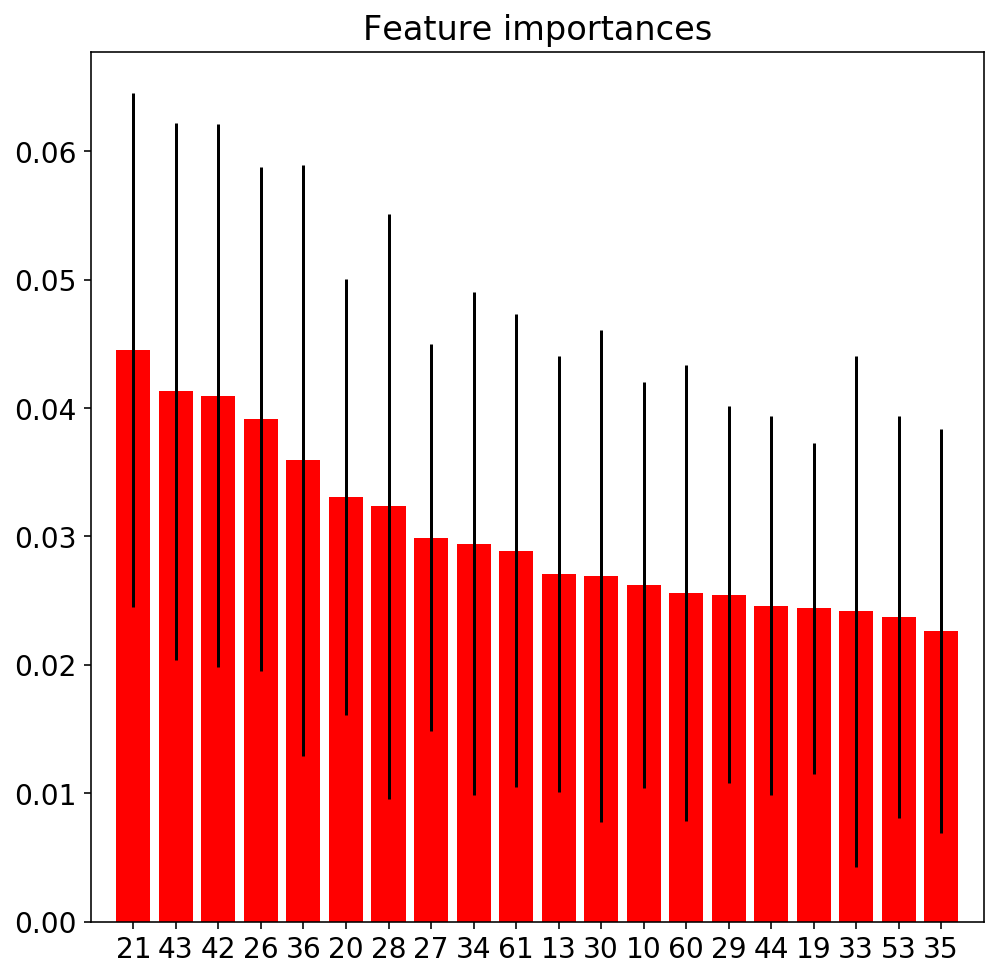

In [39]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(M), importances[most_important],
       color="r", yerr=std[most_important], align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

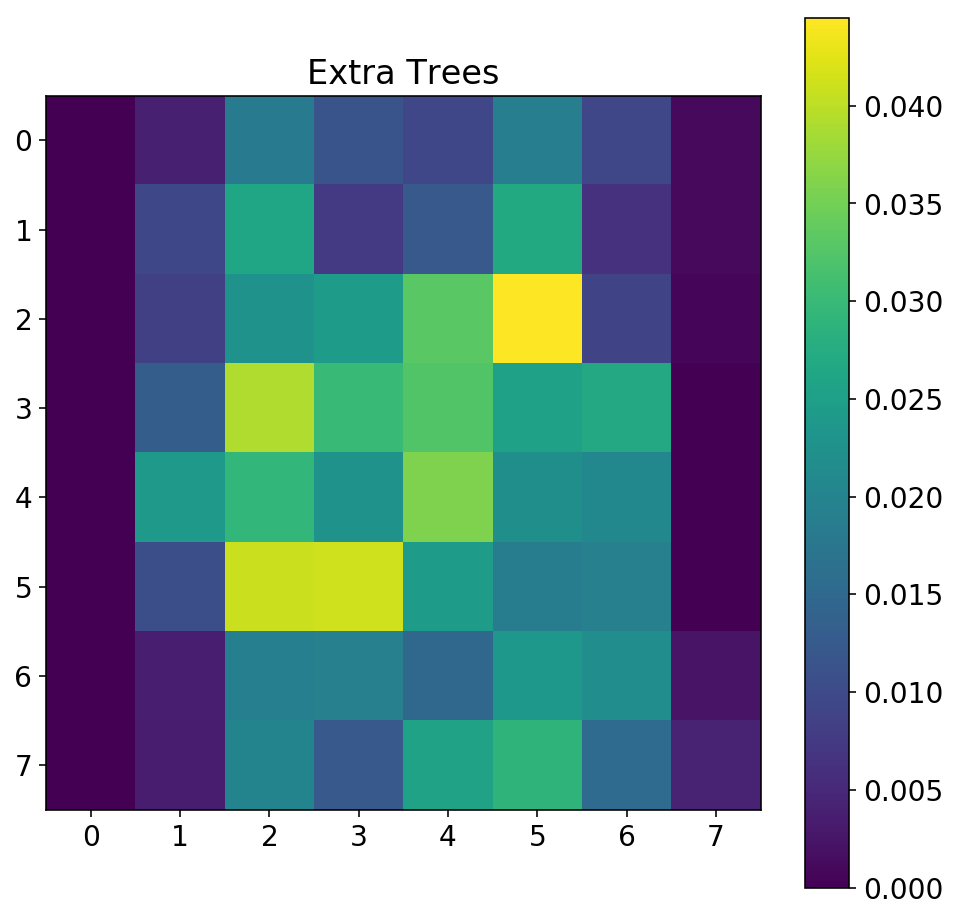

In [40]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Extra Trees')
plt.savefig('images/importances_ExtraTrees.png')

### GradientBoosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimators = [100, 200, 400, 800, 1200]
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.4]
max_depth = [1, 2, 3, 4]
for n in n_estimators:
    for r in learning_rates:
        for d in max_depth:
            forest = GradientBoostingClassifier(n_estimators=n, loss='deviance', learning_rate=r, max_depth=d)
            forest.random_state = 42*42
            forest.fit(X_train,y_train)
            print(n, r, d, forest.score(X_val, y_val))

100 0.01 1 0.738888888889
100 0.01 2 0.869444444444
100 0.01 3 0.925
100 0.01 4 0.927777777778
100 0.05 1 0.897222222222
100 0.05 2 0.955555555556
100 0.05 3 0.963888888889
100 0.05 4 0.958333333333
100 0.1 1 0.919444444444
100 0.1 2 0.963888888889
100 0.1 3 0.966666666667
100 0.1 4 0.961111111111
100 0.2 1 0.958333333333
100 0.2 2 0.975
100 0.2 3 0.966666666667
100 0.2 4 0.958333333333
100 0.4 1 0.969444444444
100 0.4 2 0.980555555556
100 0.4 3 0.961111111111
100 0.4 4 0.961111111111
200 0.01 1 0.827777777778
200 0.01 2 0.905555555556
200 0.01 3 0.936111111111
200 0.01 4 0.941666666667
200 0.05 1 0.919444444444
200 0.05 2 0.969444444444
200 0.05 3 0.966666666667
200 0.05 4 0.961111111111
200 0.1 1 0.958333333333
200 0.1 2 0.975
200 0.1 3 0.969444444444
200 0.1 4 0.961111111111
200 0.2 1 0.961111111111
200 0.2 2 0.977777777778
200 0.2 3 0.966666666667
200 0.2 4 0.958333333333
200 0.4 1 0.966666666667
200 0.4 2 0.980555555556
200 0.4 3 0.961111111111
200 0.4 4 0.961111111111
400 0.01 1 

In [101]:
hyperparams = np.loadtxt("GradientBoosting_hyperparams_Question2.dat")
print (np.max(hyperparams[:,-1]))
print (hyperparams[ hyperparams[:,-1] == np.max(hyperparams[:,-1]), : ] )

0.980555555556
[[  1.00000000e+02   4.00000000e-01   2.00000000e+00   9.80555556e-01]
 [  2.00000000e+02   4.00000000e-01   2.00000000e+00   9.80555556e-01]
 [  4.00000000e+02   4.00000000e-01   2.00000000e+00   9.80555556e-01]
 [  8.00000000e+02   4.00000000e-01   2.00000000e+00   9.80555556e-01]
 [  1.20000000e+03   4.00000000e-01   2.00000000e+00   9.80555556e-01]]


In [102]:
from sklearn.ensemble import GradientBoostingClassifier
forest = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.4, max_depth=2)
forest.random_state = 42*42
forest.fit(X_train,y_train)
forest.score(X_val, y_val)

0.98055555555555551

Feature ranking:
1. feature 43 (0.024544)
2. feature 29 (0.024538)
3. feature 21 (0.024136)
4. feature 51 (0.024127)
5. feature 60 (0.023563)
6. feature 19 (0.019796)
7. feature 42 (0.018872)
8. feature 4 (0.017980)
9. feature 37 (0.017684)
10. feature 53 (0.017172)
11. feature 26 (0.017088)
12. feature 50 (0.016027)
13. feature 3 (0.014989)
14. feature 36 (0.014870)
15. feature 17 (0.014179)
16. feature 27 (0.014075)
17. feature 61 (0.014010)
18. feature 28 (0.013873)
19. feature 18 (0.013214)
20. feature 34 (0.013056)
21. feature 13 (0.012026)
22. feature 45 (0.011027)
23. feature 14 (0.010767)
24. feature 9 (0.010515)
25. feature 20 (0.010475)
26. feature 44 (0.010326)
27. feature 12 (0.010325)
28. feature 22 (0.010236)
29. feature 5 (0.009209)
30. feature 11 (0.009107)
31. feature 10 (0.009085)
32. feature 58 (0.009064)
33. feature 2 (0.008992)
34. feature 33 (0.008978)
35. feature 46 (0.008682)
36. feature 59 (0.008441)
37. feature 38 (0.008026)
38. feature 30 (0.008016)
39. featu

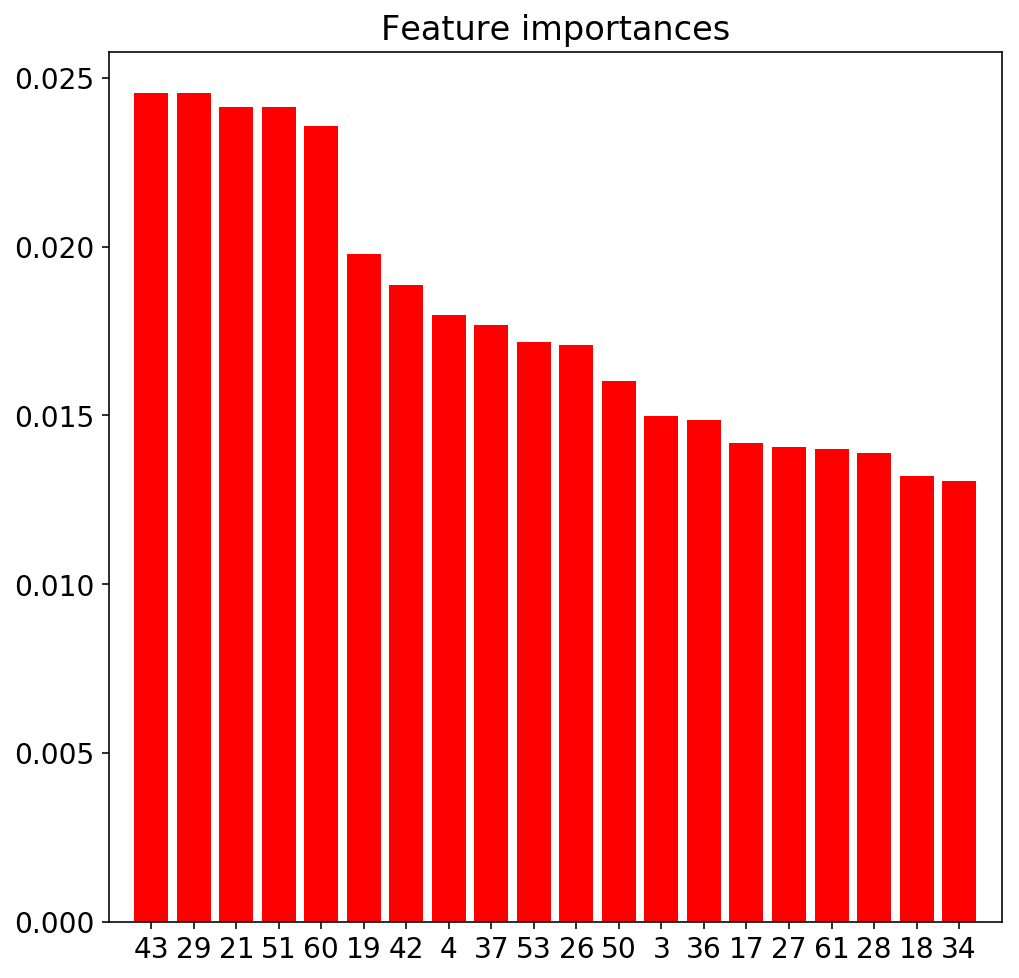

In [103]:
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
# only plot the M most important
M = 20
most_important = indices[:M]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
#plt.bar(range(M), importances[most_important],
#       color="r", yerr=std[most_important], align="center")
plt.bar(range(M), importances[most_important],
       color="r", align="center")
plt.xticks(range(M), most_important)
plt.xlim([-1, M])
plt.show()

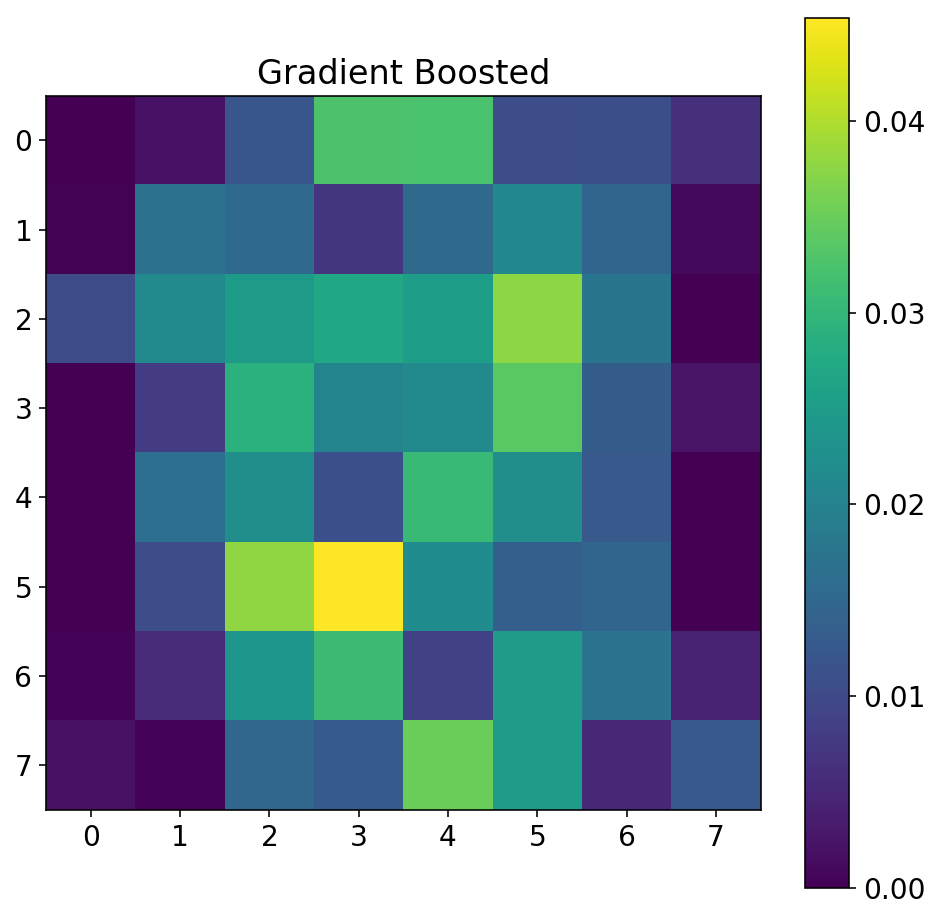

In [47]:
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Gradient Boosted')
plt.savefig('images/importances_GradientBoosted.png')

## Bonus: binary classification

In [104]:
y_train_binary = y_train % 2
y_val_binary = y_val % 2
print(y_val_binary)

[0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1]


0.994444444444


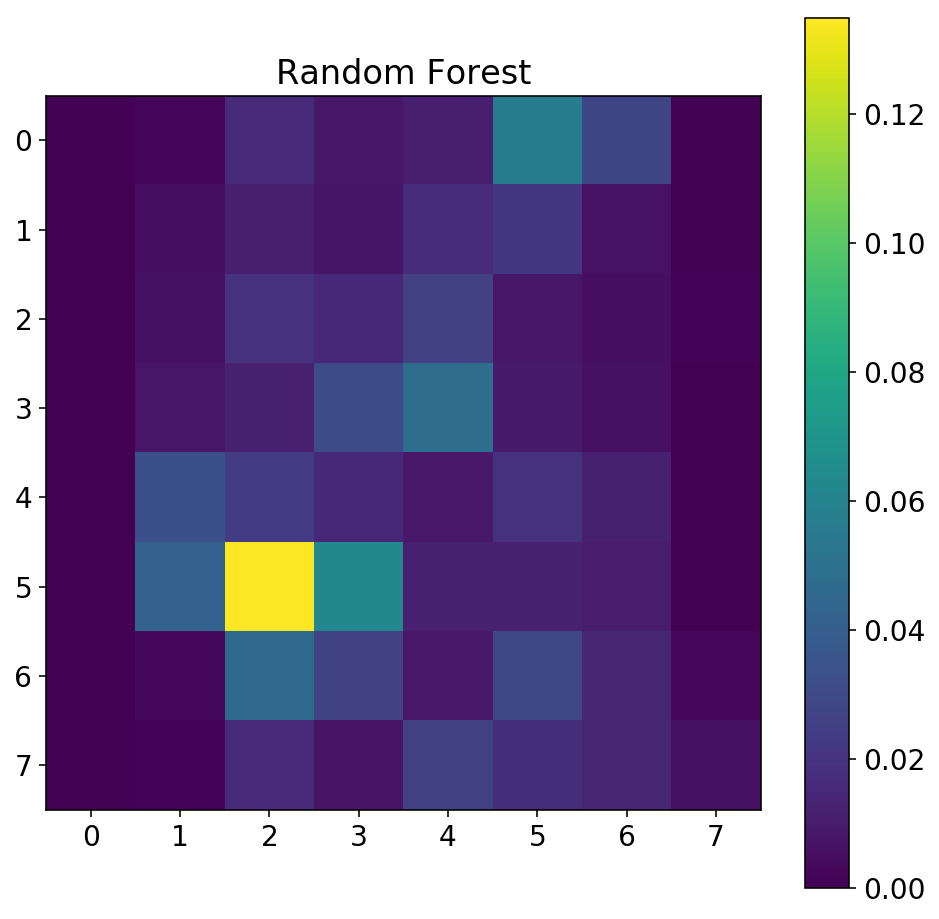

In [105]:
forest = RandomForestClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Random Forest')
plt.savefig('images/importances_RandomForest_binary.png')

0.994444444444


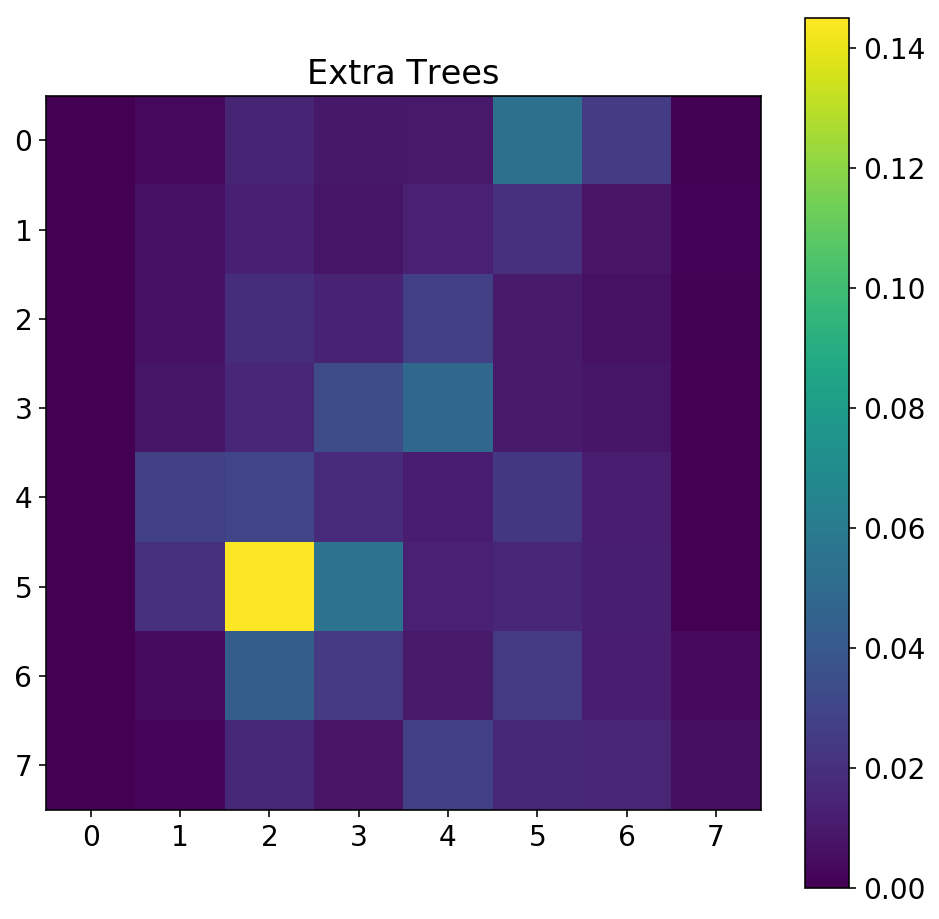

In [106]:
forest = ExtraTreesClassifier(n_estimators=1200)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Extra Trees')
plt.savefig('images/importances_ExtraTrees_binary.png')

0.972222222222


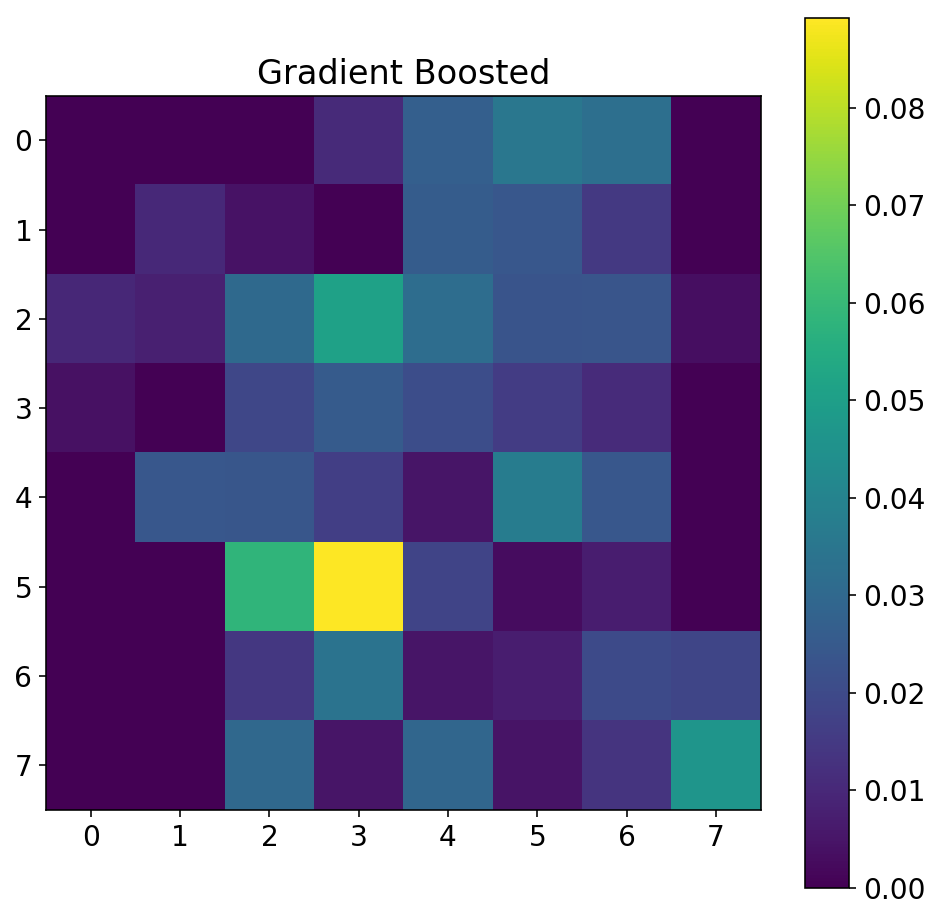

In [107]:
forest = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.4, max_depth=2)
forest.random_state = 42*42
forest.fit(X_train,y_train_binary)
print(forest.score(X_val, y_val_binary))
importances = forest.feature_importances_
plt.imshow(importances.reshape((8,8)))
plt.colorbar()
plt.title('Gradient Boosted')
plt.savefig('images/importances_GradientBoosted_binary.png')

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

# Summary of results

### Feature importance

Reminder from [Scikit doc](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier): The importance of a feature is computed as the (normalized) total reduction of the impurity criterion brought by that feature.

From the way the $y$ data is generated and the above definition of importance, I make the following assumptions:
- features 3,4 are the most informative, because they are used in the generation of $y$ but also include noise;
- features 0,1,2 are informative, but not so much because they don't have any noise, and as such the reduction of impurity brought by separating them is smaller than if they had noise;
- features 5,6,7 are uninformative.

The GradientBoostingRegressor gives the following importance ranking: 2,7,3,5,4,0,1,6. We see that it makes several mistakes on this dataset in terms of importance, by believing that 7 is the second most-informative feature and that 4 is only the sixth most informative. 
The ExtraTreesRegressor, on the other hand, gives very clear results that are in line with my previous assumptions. 

Strangely, the GradientBoostingRegressor achieves a much higher score (defined here as the $R^2$ coefficient) even though it fails to recognize the most informative features.

### Partial dependence plot

The results from the partial dependence plots are quite stunning.
<img src="images/partial_dependence_GradientBoosting.png" />

These plots are able to recover the nature of dependence of the individual variables, for example the quadratic dependence on feature 2. Unfortunately, it is difficult for such plots to highlight interactions between features, such as the product of features 0 and 1. Nonetheless, they are a very valuable source of information.

#### Tuning hyperparameters

In [54]:
n_estimators= [100, 200, 400]
max_depth= [1,2]
learning_rate = [0.05, 0.1, 0.2, 0.4, 0.6]
scores = np.zeros((len(n_estimators)*len(max_depth)*len(learning_rate),4))
row=0
for n in n_estimators:
    for d in max_depth:
        for r in learning_rate:
            rgr = GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=r)
            rgr.fit(X_train,y_train)
            score = rgr.score(X_val,y_val)
            scores[row,0] = n
            scores[row,1] = d
            scores[row,2] = r
            scores[row,3] = score
            row += 1

print(scores)
print(np.max(scores[:,-1]))
print(scores[ scores[:,-1] == np.max(scores[:,-1]) ,:] )

[[  1.00000000e+02   1.00000000e+00   5.00000000e-02   7.49562029e-01]
 [  1.00000000e+02   1.00000000e+00   1.00000000e-01   8.74020127e-01]
 [  1.00000000e+02   1.00000000e+00   2.00000000e-01   9.43235310e-01]
 [  1.00000000e+02   1.00000000e+00   4.00000000e-01   9.48443085e-01]
 [  1.00000000e+02   1.00000000e+00   6.00000000e-01   9.44052473e-01]
 [  1.00000000e+02   2.00000000e+00   5.00000000e-02   9.06725161e-01]
 [  1.00000000e+02   2.00000000e+00   1.00000000e-01   9.62728897e-01]
 [  1.00000000e+02   2.00000000e+00   2.00000000e-01   9.75736146e-01]
 [  1.00000000e+02   2.00000000e+00   4.00000000e-01   9.64615217e-01]
 [  1.00000000e+02   2.00000000e+00   6.00000000e-01   9.51604373e-01]
 [  2.00000000e+02   1.00000000e+00   5.00000000e-02   8.71145852e-01]
 [  2.00000000e+02   1.00000000e+00   1.00000000e-01   9.40286783e-01]
 [  2.00000000e+02   1.00000000e+00   2.00000000e-01   9.55773488e-01]
 [  2.00000000e+02   1.00000000e+00   4.00000000e-01   9.52927879e-01]
 [  2.

In [55]:
rgr = GradientBoostingRegressor(n_estimators=400, max_depth=2, learning_rate=0.2)
rgr.random_state = 42
rgr.fit(X_train,y_train)
score = rgr.score(X_val,y_val)
print(score)

0.979987342507


Feature ranking:
1. feature 4 (0.180573)
2. feature 2 (0.174031)
3. feature 3 (0.154530)
4. feature 0 (0.123344)
5. feature 1 (0.101422)
6. feature 6 (0.091443)
7. feature 7 (0.087665)
8. feature 5 (0.086991)


([<matplotlib.axis.XTick at 0x11444d7f0>,
 <a list of 8 Text xticklabel objects>)

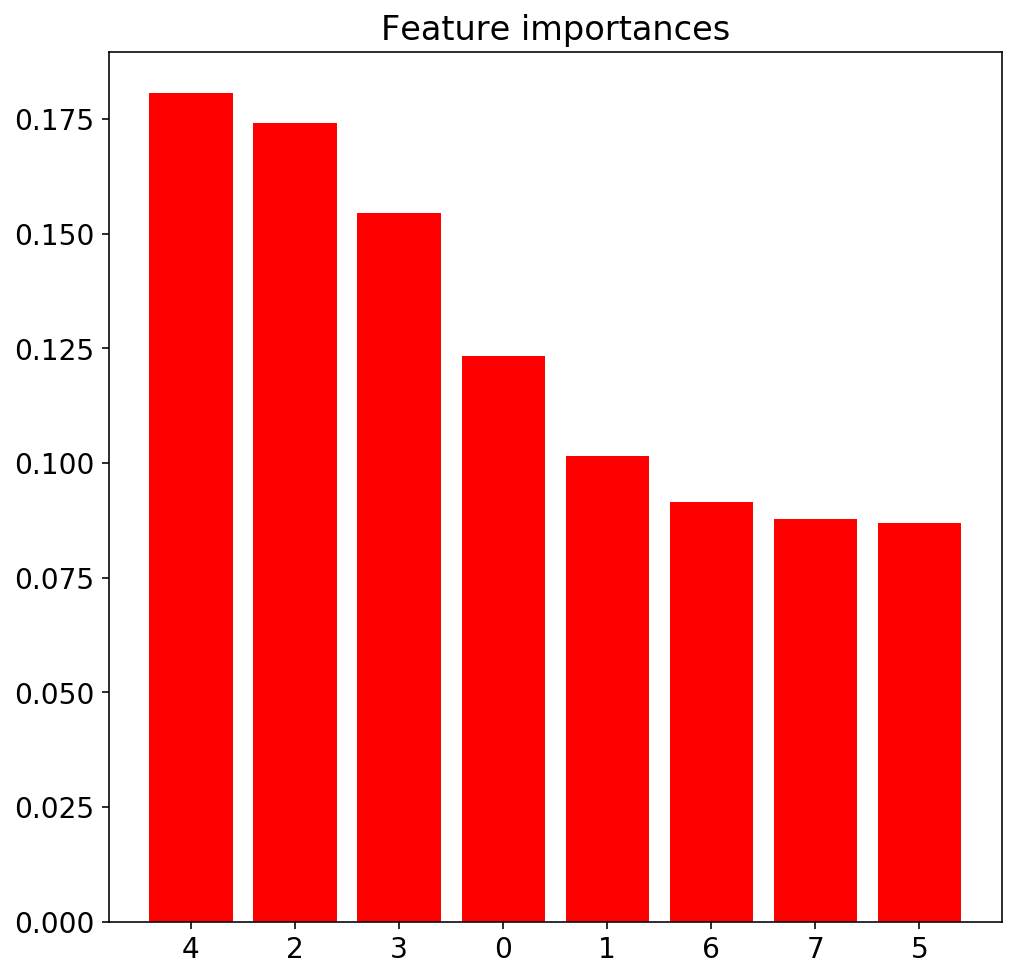

In [56]:
importances = rgr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(len(indices)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(indices)), indices)


In [57]:
from sklearn.ensemble import ExtraTreesRegressor
rgr = ExtraTreesRegressor(n_estimators=400)
rgr.fit(X_train,y_train)
score = rgr.score(X_val,y_val)
print(score)

0.928475874796


Feature ranking:
1. feature 4 (0.377357)
2. feature 3 (0.319574)
3. feature 1 (0.105492)
4. feature 0 (0.101774)
5. feature 2 (0.049031)
6. feature 7 (0.015922)
7. feature 5 (0.015886)
8. feature 6 (0.014964)


([<matplotlib.axis.XTick at 0x11381ccf8>,
 <a list of 8 Text xticklabel objects>)

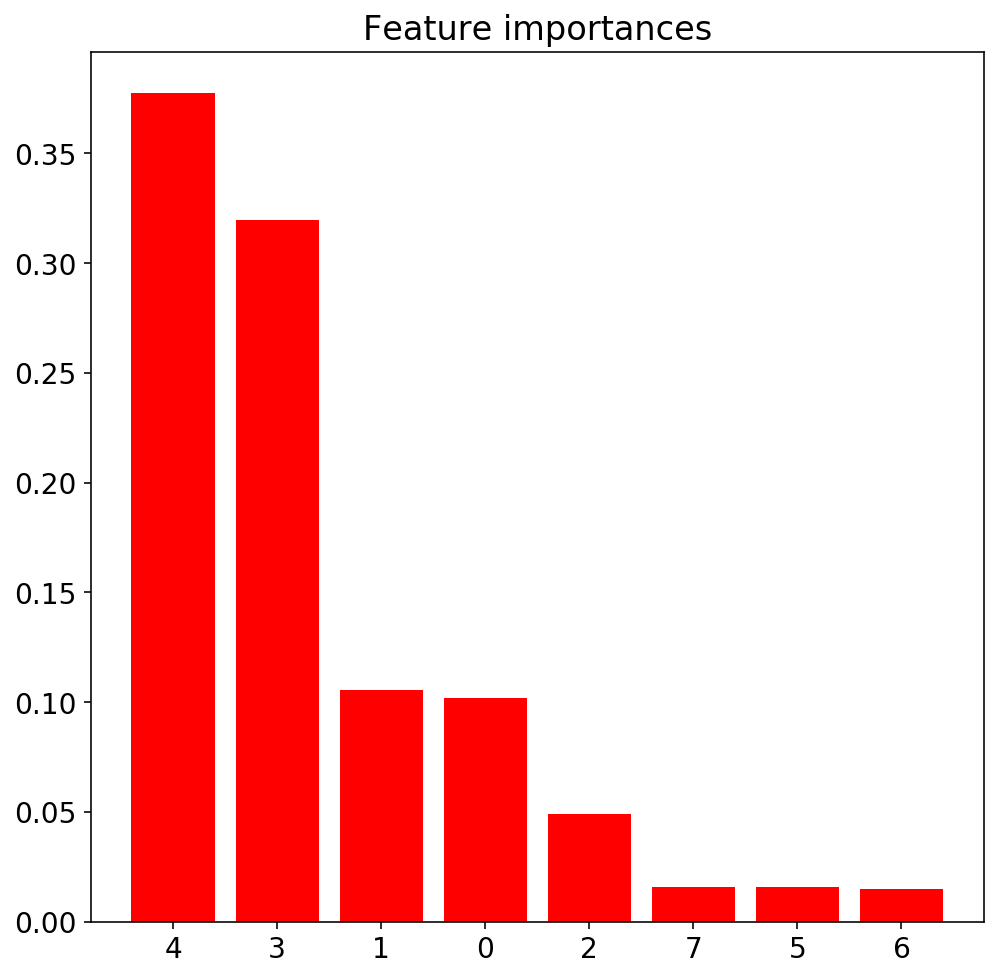

In [58]:
importances = rgr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(len(indices)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(indices)), indices)


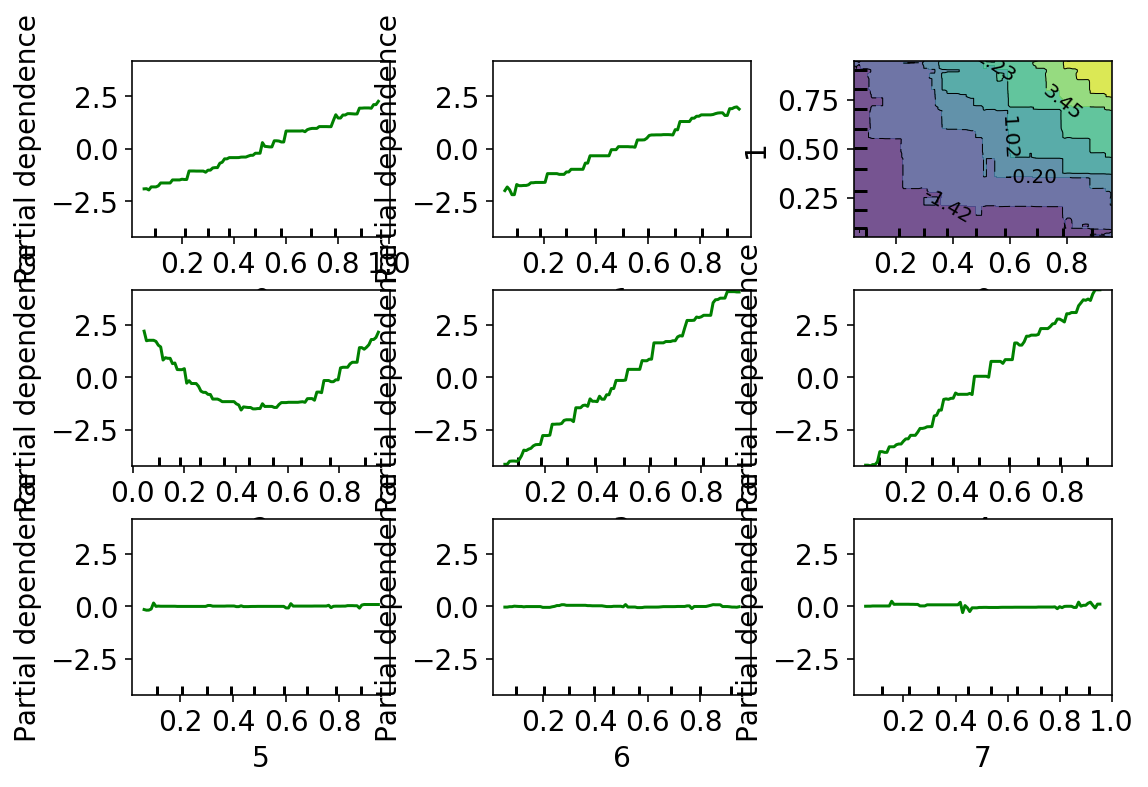

In [59]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

rgr = GradientBoostingRegressor(n_estimators=400, max_depth=2, learning_rate=0.2)
rgr.random_state = 42
features = [0, 1, (0,1), 2,3, 4,5,6,7]
rgr.fit(X_train,y_train)
fig, axs = plot_partial_dependence(rgr, X_train, features)
plt.savefig('images/partial_dependence_GradientBoosting.png')

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [60]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

In [61]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [62]:
X = cal_housing.data
y = cal_housing.target
print(X.shape)
print(np.unique(y))

(20640, 8)
[ 0.14999  0.175    0.225   ...,  4.991    5.       5.00001]


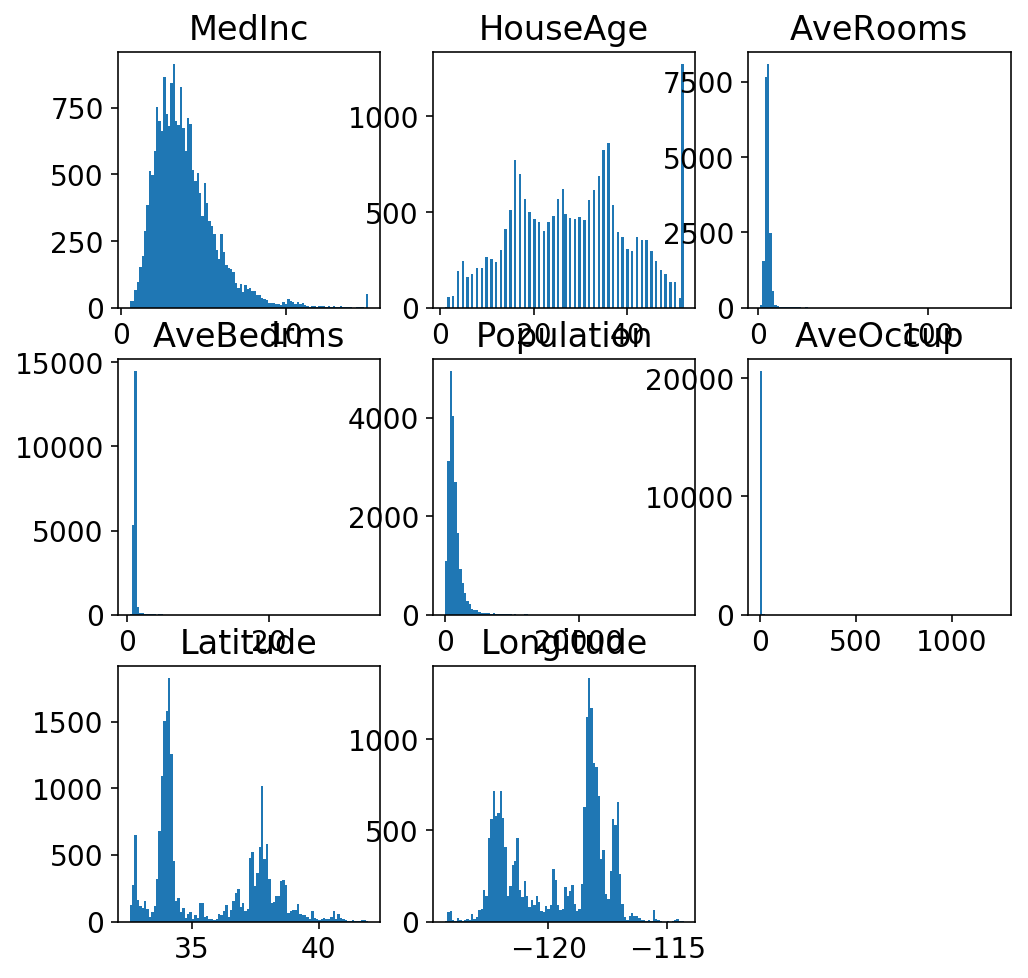

In [63]:
n_feat = 8
for i in range(n_feat):
    ax = plt.subplot(3,3,i+1)
    ax.hist(X[:,i], bins=100)
    ax.set_title(cal_housing.feature_names[i])

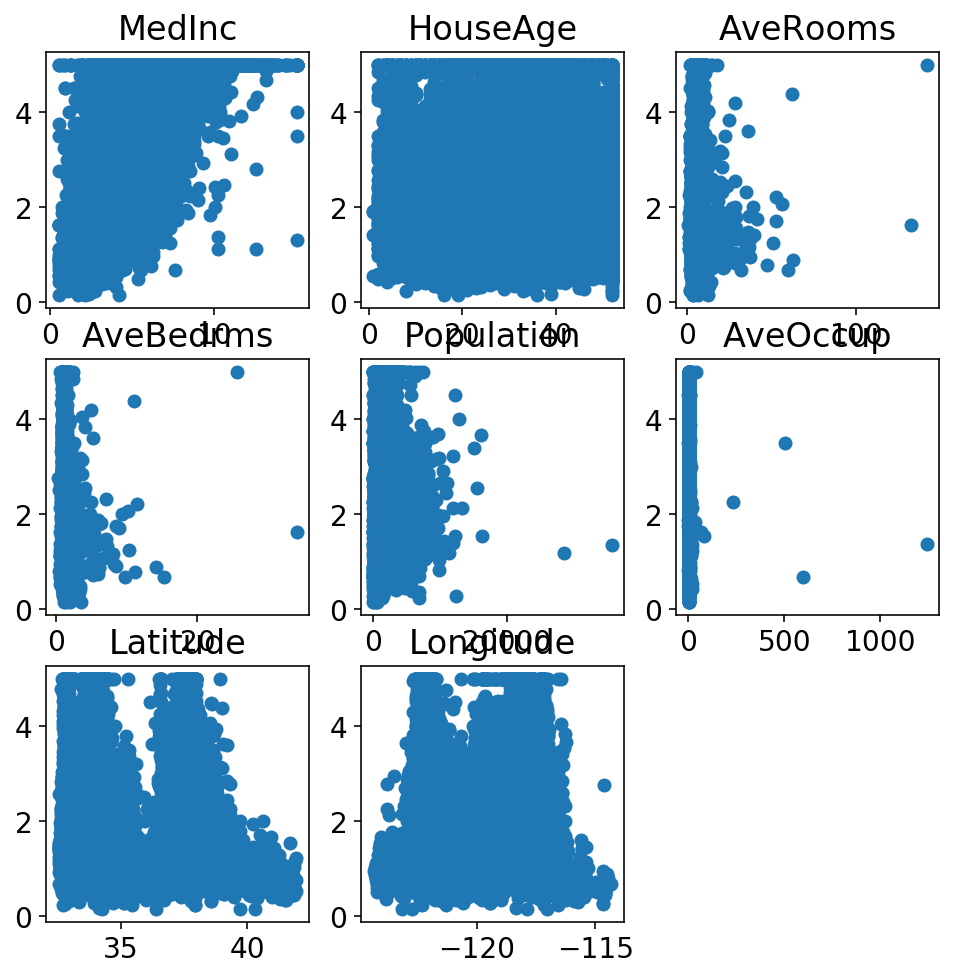

In [64]:
n_feat = 8
for i in range(n_feat):
    ax = plt.subplot(3,3,i+1)
    ax.scatter(X[:,i], y)
    ax.set_title(cal_housing.feature_names[i])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators= [200, 400, 800]
max_depth= [7,8,9]
learning_rate = [0.1, 0.2]
scores = np.zeros((len(n_estimators)*len(max_depth)*len(learning_rate),4))
row=0
for n in n_estimators:
    for d in max_depth:
        for r in learning_rate:
            rgr = GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=r)
            rgr.random_state = 42
            rgr.fit(X_train,y_train)
            score = rgr.score(X_val,y_val)
            scores[row,0] = n
            scores[row,1] = d
            scores[row,2] = r
            scores[row,3] = score
            row += 1

print(scores)
print(np.max(scores[:,-1]))
print(scores[ scores[:,-1] == np.max(scores[:,-1]) ,:] )

[[  2.00000000e+02   7.00000000e+00   1.00000000e-01   8.41935189e-01]
 [  2.00000000e+02   7.00000000e+00   2.00000000e-01   8.38016015e-01]
 [  2.00000000e+02   8.00000000e+00   1.00000000e-01   8.41788148e-01]
 [  2.00000000e+02   8.00000000e+00   2.00000000e-01   8.36517661e-01]
 [  2.00000000e+02   9.00000000e+00   1.00000000e-01   8.40049641e-01]
 [  2.00000000e+02   9.00000000e+00   2.00000000e-01   8.27851674e-01]
 [  4.00000000e+02   7.00000000e+00   1.00000000e-01   8.44588500e-01]
 [  4.00000000e+02   7.00000000e+00   2.00000000e-01   8.38523039e-01]
 [  4.00000000e+02   8.00000000e+00   1.00000000e-01   8.44536992e-01]
 [  4.00000000e+02   8.00000000e+00   2.00000000e-01   8.37065218e-01]
 [  4.00000000e+02   9.00000000e+00   1.00000000e-01   8.41907580e-01]
 [  4.00000000e+02   9.00000000e+00   2.00000000e-01   8.28149978e-01]
 [  8.00000000e+02   7.00000000e+00   1.00000000e-01   8.47645111e-01]
 [  8.00000000e+02   7.00000000e+00   2.00000000e-01   8.38533958e-01]
 [  8.

In [67]:
rgr = GradientBoostingRegressor(n_estimators=1600, max_depth=8, learning_rate=0.01)
rgr.fit(X_train,y_train)
pred = rgr.predict(X_val)
print(rgr.score(X_val,y_val))

0.843890899885


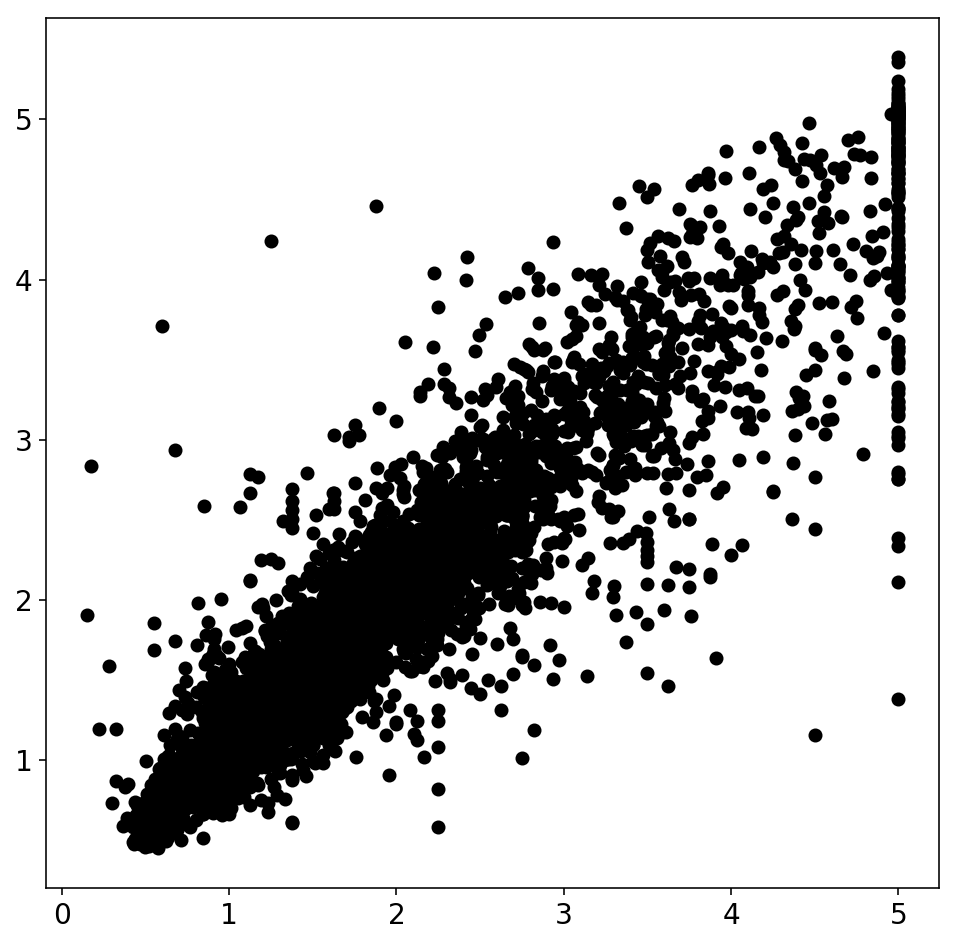

In [68]:
plt.plot(y_val,pred,'ok')

[0 7 6 5 2 4 3 1]
Feature ranking:
1. feature MedInc (0.191344)
2. feature Longitude (0.156628)
3. feature Latitude (0.149753)
4. feature AveOccup (0.127259)
5. feature AveRooms (0.118234)
6. feature Population (0.096430)
7. feature AveBedrms (0.091379)
8. feature HouseAge (0.068973)


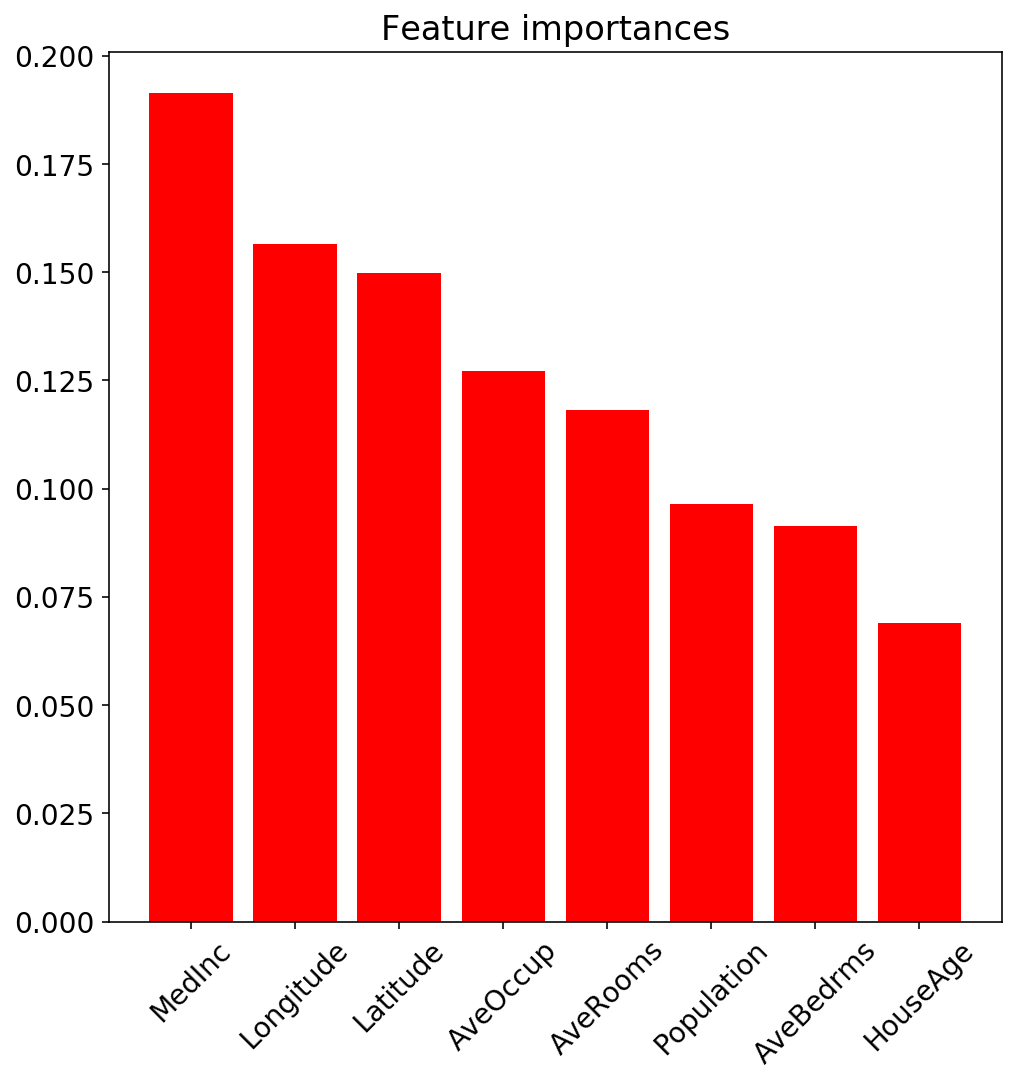

In [69]:
importances = rgr.feature_importances_
indices = np.argsort(importances)[::-1]
names = cal_housing.feature_names

print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()
plt.title("Feature importances")

ax.bar(range(len(indices)), importances[indices],
       color="r", align="center")
#plt.xticks(range(len(indices)), indices)

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range(len(names)):
    labels[i+1] = names[indices[i]]

ax.set_xticklabels(labels, rotation=45)

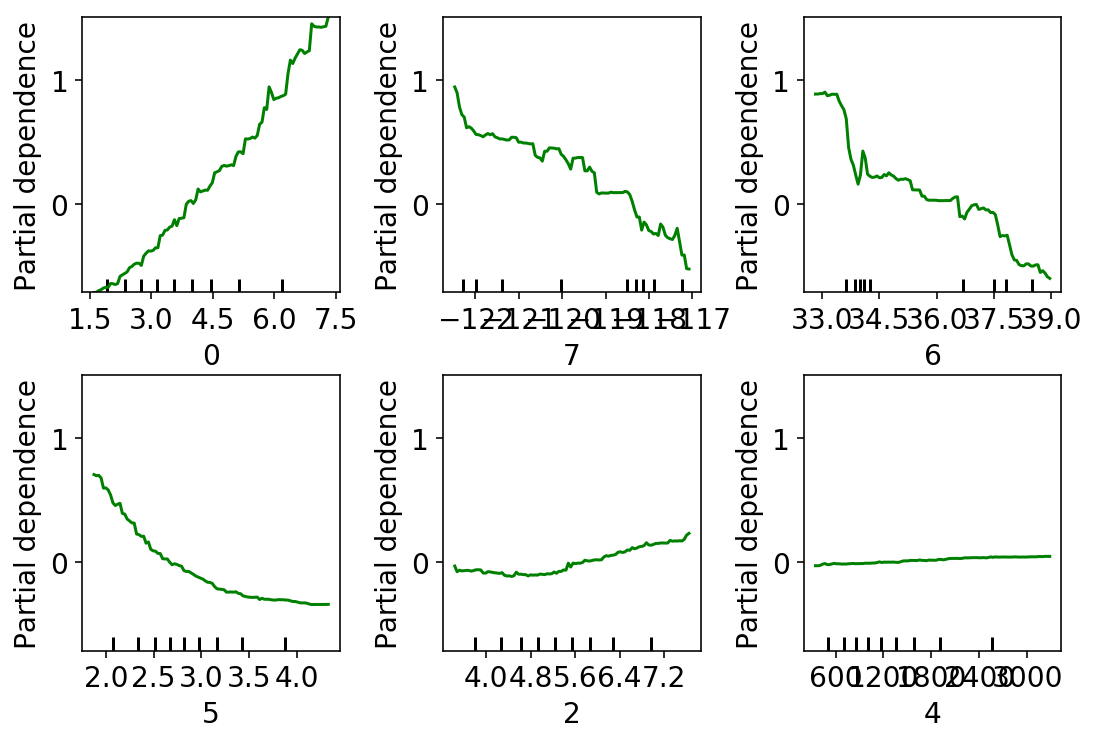

In [70]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

features = [0, 7, 6, 5, 2, 4]

fig, axs = plot_partial_dependence(rgr, X_train, features)


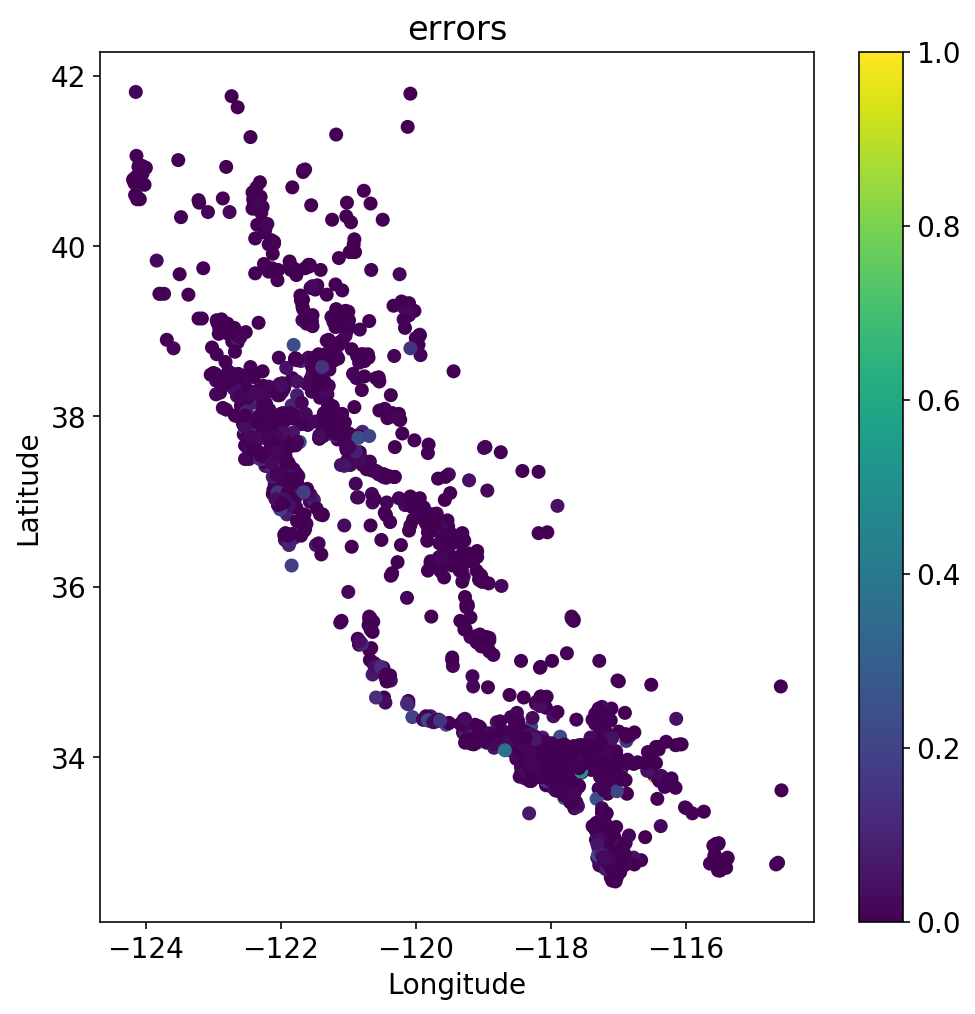

In [71]:
errors = (y_val - pred)**2
max_err = np.max(errors)
cmap=plt.get_cmap('viridis')

sc = plt.scatter(X_val[:,-1],X_val[:,-2],c=cmap(errors/max_err))
plt.title('errors')
plt.xlabel(cal_housing.feature_names[-1])
plt.ylabel(cal_housing.feature_names[-2])

# strange stuff to do in order to plot colorbar
# from http://stackoverflow.com/questions/6600579/colorbar-for-matplotlib-plot-surface-command
import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(errors/max_err)
plt.colorbar(m)

### Feature engineering

In [72]:
print(cal_housing.feature_names)
new_X_train = X_train[:,0]
new_X_val = X_val[:,0]

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [73]:
rgr = GradientBoostingRegressor(n_estimators=1600, max_depth=8, learning_rate=0.01)
rgr.fit(new_X_train.reshape(-1, 1),y_train)
pred = rgr.predict(new_X_val.reshape(-1, 1))
print(rgr.score(new_X_val.reshape(-1, 1),y_val))

0.443527366535


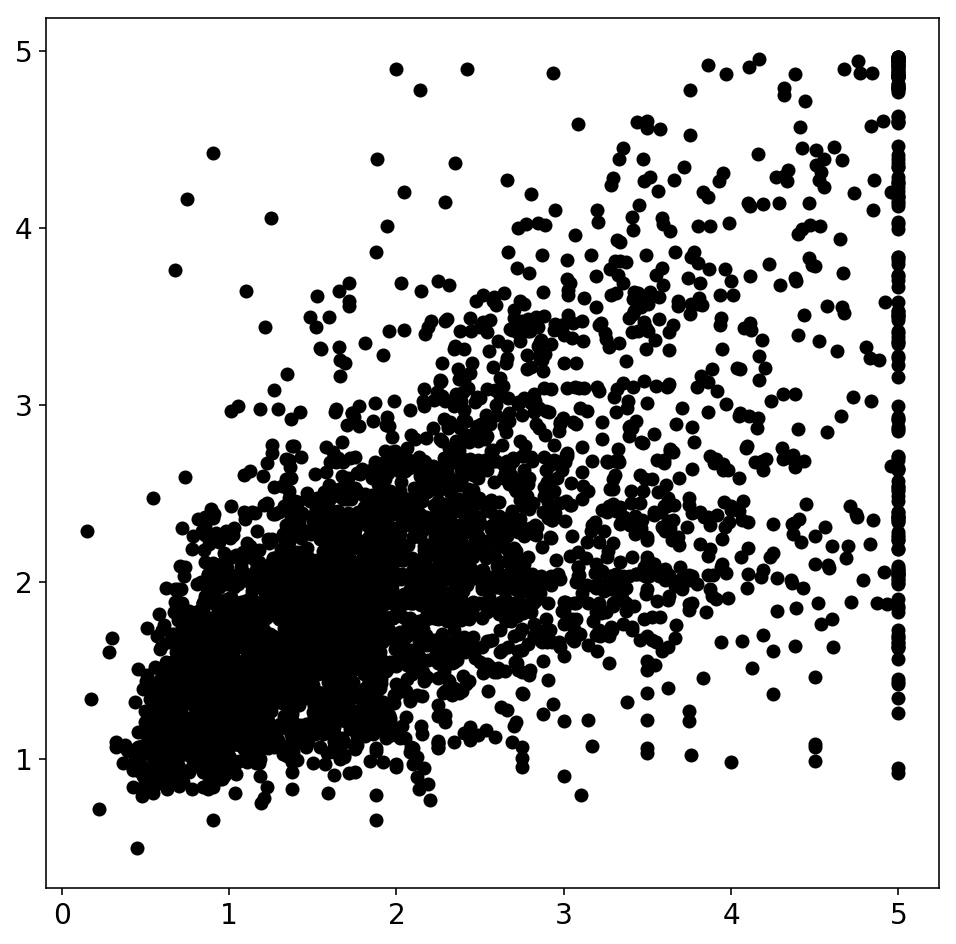

In [74]:
plt.plot(y_val,pred,'ok')

In [75]:
print(cal_housing.feature_names)
new_X_train = X_train[:,[0,-2,-1,5]]
new_X_val = X_val[:,[0,-2,-1,5]]
print(new_X_train.shape)
print(new_X_val.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(16512, 4)
(4128, 4)


In [76]:
rgr = GradientBoostingRegressor(n_estimators=1600, max_depth=8, learning_rate=0.01)
rgr.fit(new_X_train,y_train)
pred = rgr.predict(new_X_val)
print(rgr.score(new_X_val,y_val))

0.824914363379


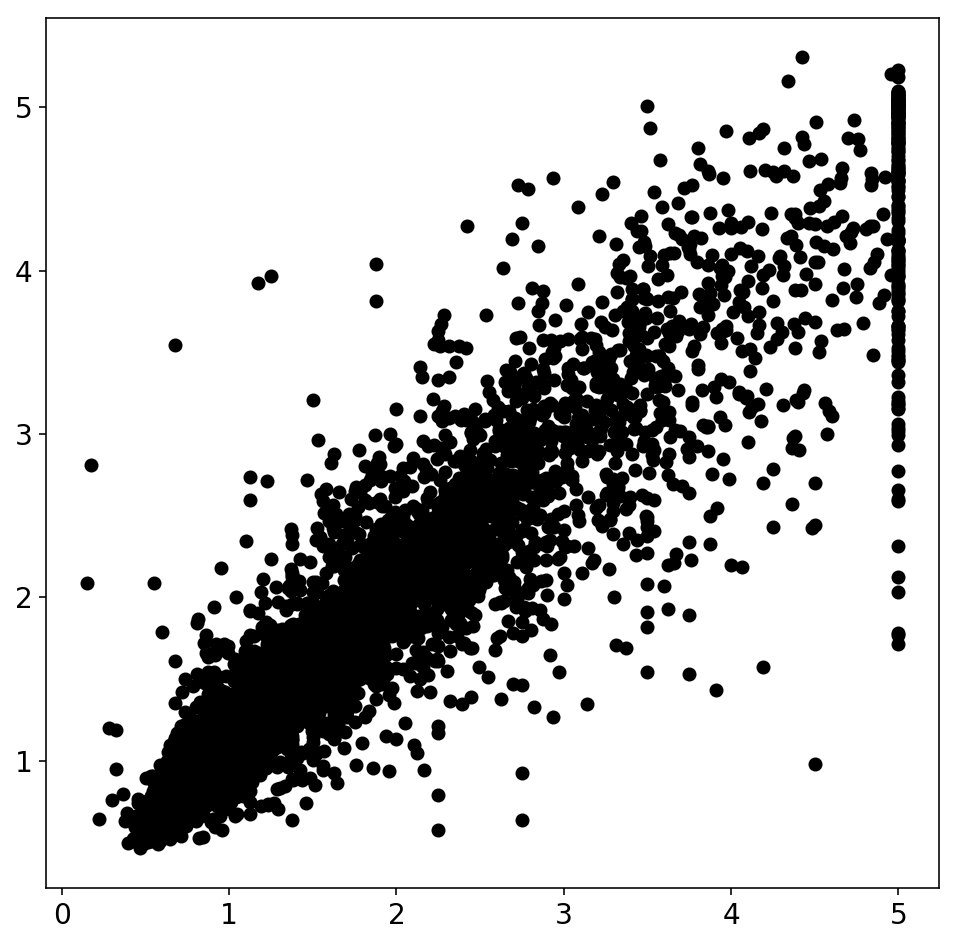

In [77]:
plt.plot(y_val,pred,'ok')

### Adding a synthetic feature

I wondered whether adding a synthetic feature:

$ rooms per person = \frac{AveRooms}{Population} $ 

would give better results, by adding the information on whether a block is densely populated or not. 
It turns out not to give a particular boost in performance.

In [78]:
print(cal_housing.feature_names)
rooms_per_person = X_train[:,2]/X_train[:,4]
rooms_per_person = rooms_per_person.reshape(X_train.shape[0],1)

new_X_train = X_train[:,[0,-2,-1,5]] 
new_X_train = np.hstack((new_X_train, rooms_per_person))
print(new_X_train.shape)

rooms_per_person_val = X_val[:,2]/X_val[:,4]
rooms_per_person_val = rooms_per_person_val.reshape(X_val.shape[0],1)
new_X_val = X_val[:,[0,-2,-1,5]]
new_X_val = np.hstack((new_X_val, rooms_per_person_val))
print(new_X_val.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(16512, 5)
(4128, 5)


In [79]:
rgr = GradientBoostingRegressor(n_estimators=1600, max_depth=8, learning_rate=0.01)
rgr.fit(new_X_train,y_train)
pred = rgr.predict(new_X_val)
print(rgr.score(new_X_val,y_val))

0.826180087891


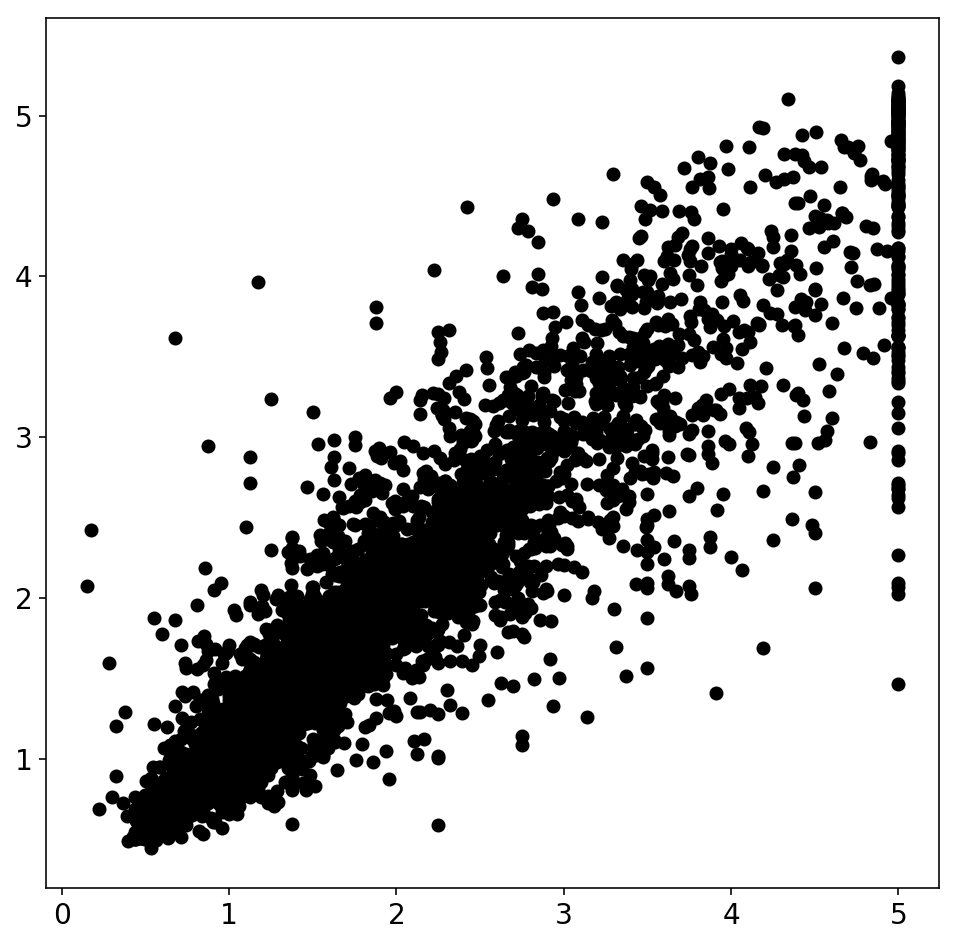

In [80]:
plt.plot(y_val,pred,'ok')

### Bucketizing

I had heard that it can be sometimes useful to bucketize Latitude and Longitude. The idea is that there is no quantitative reason why a certain latitude should correspond to a given house cost, except for the fact that it indicates whether the house is located (or not) in a certain, high cost area.
To give an example, I bucketize longitude in 3 buckets based on quantiles, which end up corresponding to the two peaks in the longitude histogram.

Unfortunately, this technique doesn't help much, and actually reduces the accuracy by quite a lot!

In [81]:
def get_quantile_based_boundaries(feature_values, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / (num_buckets)
    quantiles = np.percentile(feature_values, 100*boundaries)
    return quantiles
    #return [quantiles[q] for q in quantiles.keys()]

In [82]:
longitude_quantile_boundaries = get_quantile_based_boundaries(X_train[:,-1],3)
latitude_quantile_boundaries = get_quantile_based_boundaries(X_train[:,-2],5)

In [83]:
def bucketize(x, boundaries):
    N = boundaries.shape[0]
    out = np.zeros((x.shape[0],N+1))
    for i,v in enumerate(x):
        flag = True
        for j,b in enumerate(boundaries):
            if v < b:
                out[i,j] = 1
                flag = False
                break
        if flag:
            out[i,-1] = 1
    return out


In [84]:
bucketized_longitude = bucketize(X_train[:,-1],longitude_quantile_boundaries)
bucketized_latitude = bucketize(X_train[:,-2],latitude_quantile_boundaries)
bucketized_longitude_val = bucketize(X_val[:,-1],longitude_quantile_boundaries)
bucketized_latitude_val = bucketize(X_val[:,-2],latitude_quantile_boundaries)

In [85]:
new_X_train = X_train[:,[0,5]] 
#new_X_train = new_X_train.reshape((X_train.shape[0],1))
new_X_train = np.hstack((new_X_train, bucketized_latitude, bucketized_longitude))
print(new_X_train.shape)
new_X_val = X_val[:,[0,5]]
#new_X_val = new_X_val.reshape((X_val.shape[0],1))
new_X_val = np.hstack((new_X_val, bucketized_latitude_val, bucketized_longitude_val))
print(new_X_val.shape)

(16512, 10)
(4128, 10)


In [86]:
rgr = GradientBoostingRegressor(n_estimators=1600, max_depth=12, learning_rate=0.005)
rgr.fit(new_X_train,y_train)
pred = rgr.predict(new_X_val)
print(rgr.score(new_X_val,y_val))

0.623031706696


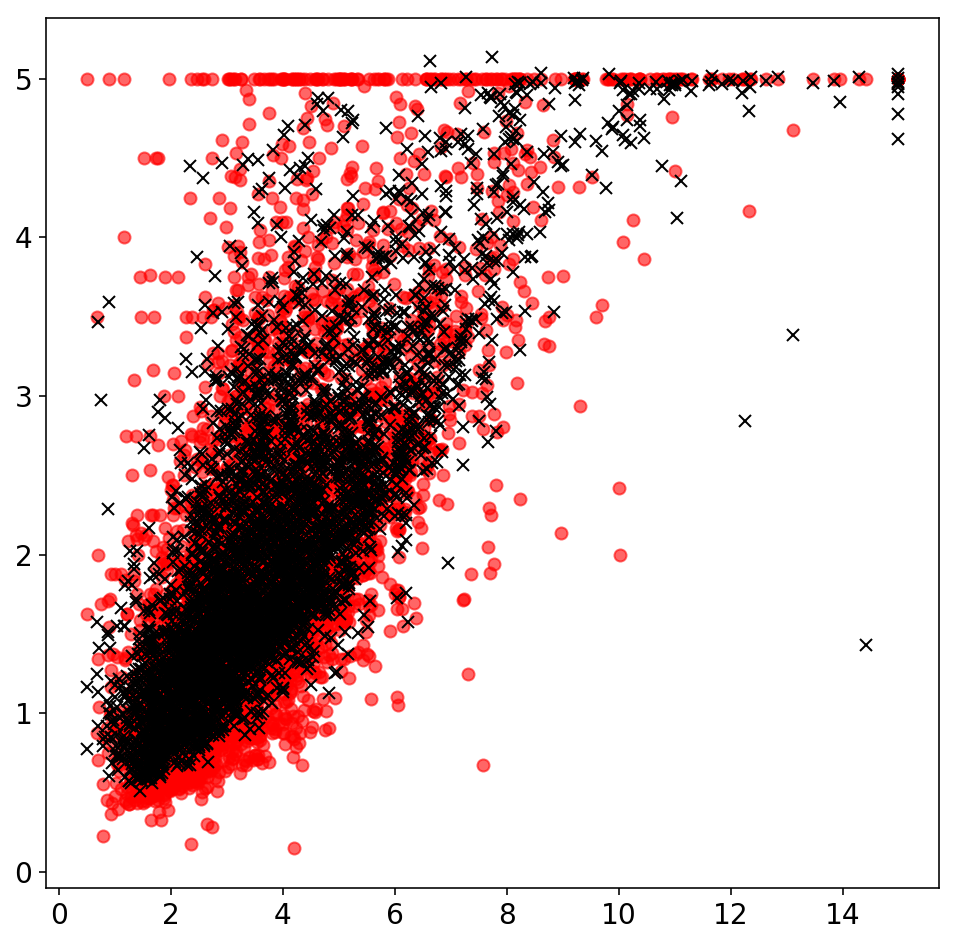

In [87]:
plt.plot(X_val[:,0],y_val,'or',alpha=0.6)
plt.plot(X_val[:,0],pred,'xk')